                                                                                                                 
# MOA1 - ML project

## Drug sensitivity prediction & precision oncology

### Drug name: Lapatinib
### Cancer type: Breast cancer

#### Authors: eveliinuuuu
#### Date: 07-03-2024

## 2. Environment and data preparation <a id="section_2"></a>

### 2.1. Importing necessary modules <a id="section_2.1"></a>

Explain shortly why you need to use certain modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Loading the data <a id="section_2.2"></a>

In [327]:
cmrna = pd.read_csv('ccle_lapatinib_mrna.csv')
test_mrna = pd.read_csv('test_lapatinib_mrna.csv')

### 2.3 Inspecting the contents of the datasets <a id="section_2.3"></a>

In [3]:
cmrna.head() # CCLE stands for "Cancer Cell Line Encyclopedia" I.e. ENSG00000000457 is a gene SCYL3. Target gene is?

,Unnamed: 0,ENSG00000000457,ENSG00000002587,ENSG00000002834,ENSG00000003147,ENSG00000004700,ENSG00000005001,ENSG00000006025,ENSG00000006210,ENSG00000006432,...,ENSG00000171720,ENSG00000150768,ENSG00000223609,ENSG00000184254,ENSG00000142453,ENSG00000126767,ENSG00000110921,ENSG00000135902,ENSG00000147400,target
0,1321N1,6.880135,3.848301,10.794302,4.690127,10.123447,4.445563,4.538893,4.615833,5.087315,...,9.134503,9.589031,4.133893,4.788095,9.064122,6.506036,6.692598,3.742148,11.095846,0.042293
1,22Rv1,7.603913,3.900054,10.375917,5.818478,9.221222,4.709274,4.368704,5.248879,5.769721,...,9.051146,10.739551,3.738919,4.547038,8.683827,6.283261,6.725295,3.595945,10.984246,0.038055
2,42-MG-BA,6.233931,3.941115,11.450783,4.669611,9.813198,4.247053,4.549676,4.099339,4.605858,...,8.967003,10.187797,3.894855,4.827834,8.871309,5.902859,6.183659,3.447135,10.794890,0.044359
3,5637,6.617399,8.529115,11.567852,4.985975,8.631822,6.256254,5.277320,4.572382,5.664203,...,9.362213,9.294305,4.004389,NaN,8.963845,6.429002,6.195342,3.815599,10.890573,0.182799
4,639V,6.297550,4.035844,10.098817,5.020515,9.245672,4.696496,4.685629,4.072386,5.869698,...,9.233923,10.531786,4.126418,NaN,10.320359,7.112178,5.848321,3.747131,11.111855,0.006600


In [4]:
test_mrna.head() # Used for testing. 

,Unnamed: 0,ENSG00000000457,ENSG00000002587,ENSG00000002834,ENSG00000003147,ENSG00000004700,ENSG00000005001,ENSG00000006025,ENSG00000006210,ENSG00000006432,...,ENSG00000171720,ENSG00000150768,ENSG00000223609,ENSG00000184254,ENSG00000142453,ENSG00000126767,ENSG00000110921,ENSG00000135902,ENSG00000147400,target
0,22Rv1,5.904857,4.220863,9.825718,5.831218,6.276092,4.458948,4.591260,5.439451,5.288703,...,7.550823,7.292422,4.002888,5.129766,7.298302,5.009156,5.689873,4.249088,8.579019,0.048663
1,23132/87,6.897813,4.485247,10.179140,6.134032,5.479471,5.413024,4.505222,4.455085,5.882130,...,7.832187,7.538726,4.101105,7.217199,9.338911,5.338835,5.856332,4.308886,8.015799,0.172438
2,5637,5.683737,6.175556,10.686857,4.791471,7.359377,5.752006,4.469279,4.344426,5.192428,...,7.791839,7.763313,4.332984,12.662105,7.440367,5.388512,5.492737,3.985426,9.352269,0.177510
3,639V,5.393536,4.092939,8.962001,5.403281,7.043343,4.717158,4.273156,4.229398,5.216957,...,7.004412,7.878990,4.053699,9.568635,8.962812,5.396634,5.577382,4.179486,9.412146,0.027675
4,647V,5.750386,4.473761,11.624712,5.791072,7.989614,6.181649,4.511697,4.272302,5.211326,...,7.655684,7.793216,4.096179,11.249919,7.252926,5.528542,6.009862,4.110557,10.055244,0.034545


<font color='red'> The first column corresponds to cancer cell lines. They could be used as index since the datasets are uploaded as data.frame </font>

In [328]:
cmrna.drop(cmrna.columns[0], axis=1, inplace=True)
test_mrna.drop(test_mrna.columns[0], axis=1, inplace=True)

In [6]:
cmrna.head()

,ENSG00000000457,ENSG00000002587,ENSG00000002834,ENSG00000003147,ENSG00000004700,ENSG00000005001,ENSG00000006025,ENSG00000006210,ENSG00000006432,ENSG00000006468,...,ENSG00000171720,ENSG00000150768,ENSG00000223609,ENSG00000184254,ENSG00000142453,ENSG00000126767,ENSG00000110921,ENSG00000135902,ENSG00000147400,target
0,6.880135,3.848301,10.794302,4.690127,10.123447,4.445563,4.538893,4.615833,5.087315,6.975632,...,9.134503,9.589031,4.133893,4.788095,9.064122,6.506036,6.692598,3.742148,11.095846,0.042293
1,7.603913,3.900054,10.375917,5.818478,9.221222,4.709274,4.368704,5.248879,5.769721,5.620889,...,9.051146,10.739551,3.738919,4.547038,8.683827,6.283261,6.725295,3.595945,10.984246,0.038055
2,6.233931,3.941115,11.450783,4.669611,9.813198,4.247053,4.549676,4.099339,4.605858,4.613806,...,8.967003,10.187797,3.894855,4.827834,8.871309,5.902859,6.183659,3.447135,10.794890,0.044359
3,6.617399,8.529115,11.567852,4.985975,8.631822,6.256254,5.277320,4.572382,5.664203,5.127059,...,9.362213,9.294305,4.004389,NaN,8.963845,6.429002,6.195342,3.815599,10.890573,0.182799
4,6.297550,4.035844,10.098817,5.020515,9.245672,4.696496,4.685629,4.072386,5.869698,4.243902,...,9.233923,10.531786,4.126418,NaN,10.320359,7.112178,5.848321,3.747131,11.111855,0.006600


In [7]:
cmrna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Columns: 789 entries, ENSG00000000457 to target
dtypes: float64(789)
memory usage: 3.0 MB


In [8]:
test_mrna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Columns: 789 entries, ENSG00000000457 to target
dtypes: float64(789)
memory usage: 3.1 MB


In [9]:
cmrna.describe()

,ENSG00000000457,ENSG00000002587,ENSG00000002834,ENSG00000003147,ENSG00000004700,ENSG00000005001,ENSG00000006025,ENSG00000006210,ENSG00000006432,ENSG00000006468,...,ENSG00000171720,ENSG00000150768,ENSG00000223609,ENSG00000184254,ENSG00000142453,ENSG00000126767,ENSG00000110921,ENSG00000135902,ENSG00000147400,target
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,444.000000,492.000000
mean,6.907155,5.169749,10.809905,5.235780,9.329664,5.060036,4.921073,4.660148,5.418563,5.565261,...,8.940618,9.641103,4.131950,7.941258,8.762748,6.331066,6.084898,3.722680,10.821708,0.067681
std,0.655048,1.628795,0.825519,0.625576,0.739295,0.939367,0.373387,0.871432,0.834598,1.307773,...,0.468780,0.643948,0.817932,3.116830,0.653752,0.387745,0.368984,0.301780,0.724594,0.085583
min,5.363405,3.547672,7.872772,4.419144,6.330313,3.869290,4.048318,3.763639,3.670519,4.075054,...,6.935177,7.218040,3.435692,3.957726,6.849136,5.524846,5.123397,3.194553,8.348612,0.000000
25%,6.430649,4.031404,10.330554,4.766886,8.877733,4.427558,4.638581,4.134008,4.848140,4.490808,...,8.671781,9.319045,3.852686,4.758750,8.364280,6.073411,5.835126,3.583200,10.398620,0.015522
50%,6.825005,4.386774,10.832955,5.033436,9.354823,4.677319,4.872718,4.332421,5.382178,5.051086,...,8.968387,9.668574,3.966488,7.528008,8.779642,6.283261,6.026572,3.688148,10.902424,0.039410
75%,7.324332,5.674342,11.380513,5.532999,9.810939,5.549609,5.153124,4.847055,5.952928,6.423505,...,9.239083,10.045487,4.127775,10.852410,9.209375,6.537322,6.303527,3.833606,11.318118,0.080802
max,9.545176,11.703664,13.734390,8.763430,11.383648,9.644475,6.445018,9.447711,8.766989,9.745949,...,10.375151,12.760665,11.056440,13.688964,10.402123,7.691826,7.378953,7.368208,12.575243,0.560371


### 2.4 Visualizing gene expression profile of cancer cell lines (CCLE and GDSC) <a id="section_2.4"></a>

In [10]:
cmrna.head(1)

,ENSG00000000457,ENSG00000002587,ENSG00000002834,ENSG00000003147,ENSG00000004700,ENSG00000005001,ENSG00000006025,ENSG00000006210,ENSG00000006432,ENSG00000006468,...,ENSG00000171720,ENSG00000150768,ENSG00000223609,ENSG00000184254,ENSG00000142453,ENSG00000126767,ENSG00000110921,ENSG00000135902,ENSG00000147400,target
0,6.880135,3.848301,10.794302,4.690127,10.123447,4.445563,4.538893,4.615833,5.087315,6.975632,...,9.134503,9.589031,4.133893,4.788095,9.064122,6.506036,6.692598,3.742148,11.095846,0.042293


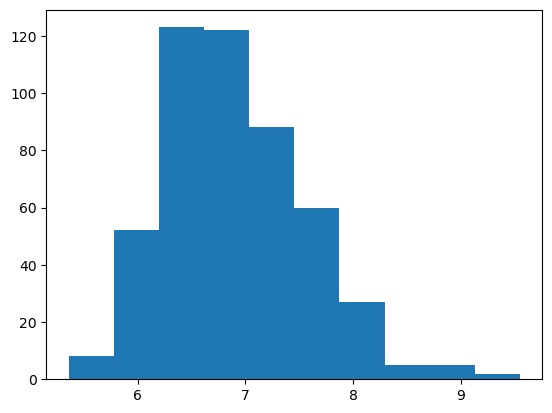

In [11]:
from matplotlib import pyplot
pyplot.hist(cmrna['ENSG00000000457']) # Visualization of distribution of the first gene. It seems to be a bit right skewed, but almost normal.
pyplot.show()

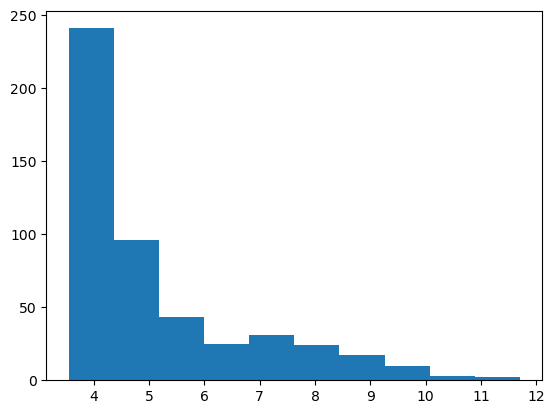

In [12]:
pyplot.hist(cmrna['ENSG00000002587']) # Visualization of distribution of the second gene. It seems to be really right skewed. Could there be a lot of 
# missing values?
pyplot.show()

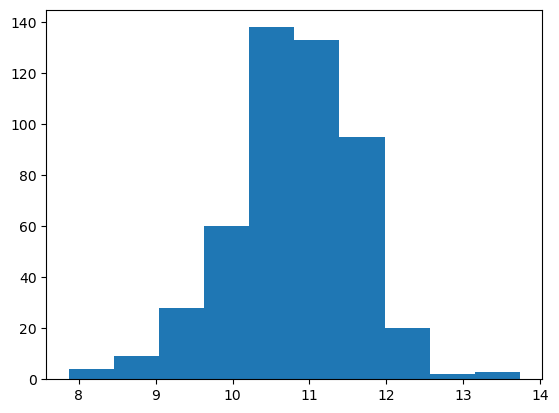

In [13]:
pyplot.hist(cmrna['ENSG00000002834']) # Visualization of distribution of the third gene. It seems to be a bit left skewed, but almost normal.
pyplot.show()

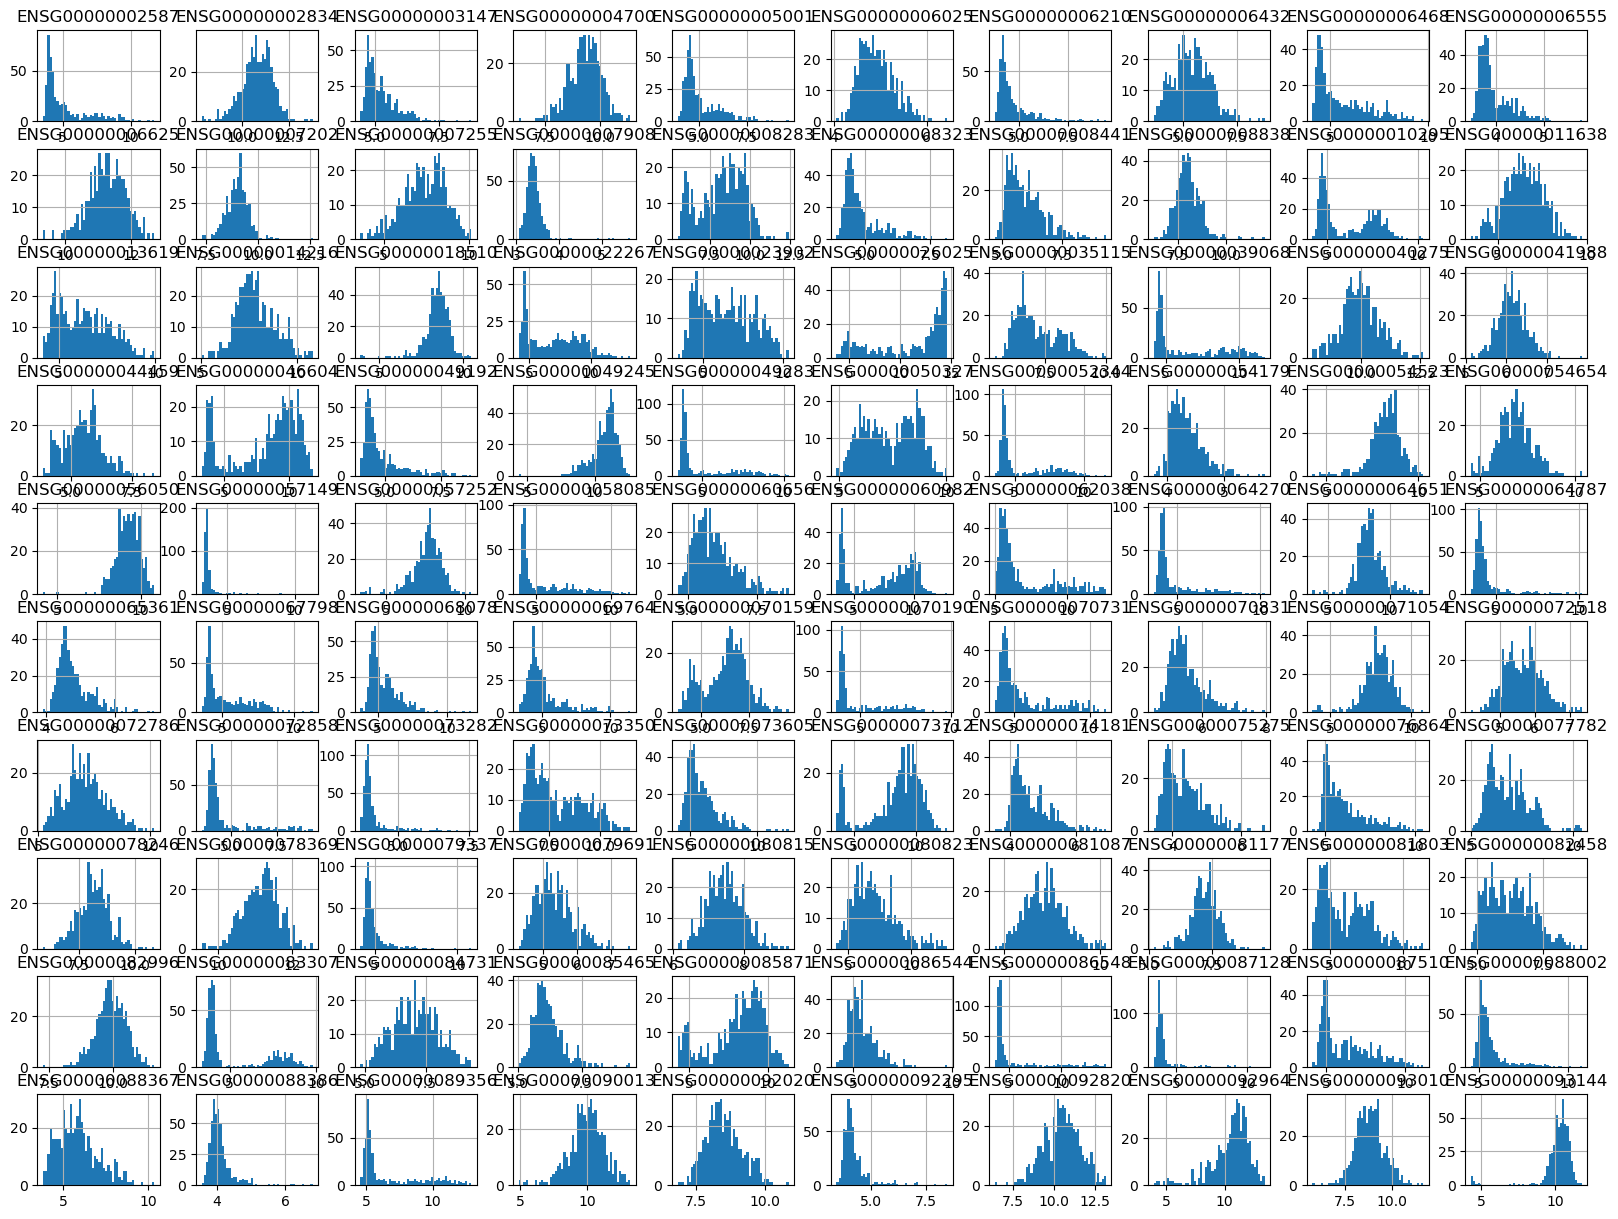

In [14]:
cmrna.iloc[:, 1:101].hist(bins=50, figsize=(20,15)) # There seems to be a lot of left and right skewed variables. Also variables with multiple peaks and outliers. 
plt.xlabel(None)
plt.ylabel(None)
plt.show()

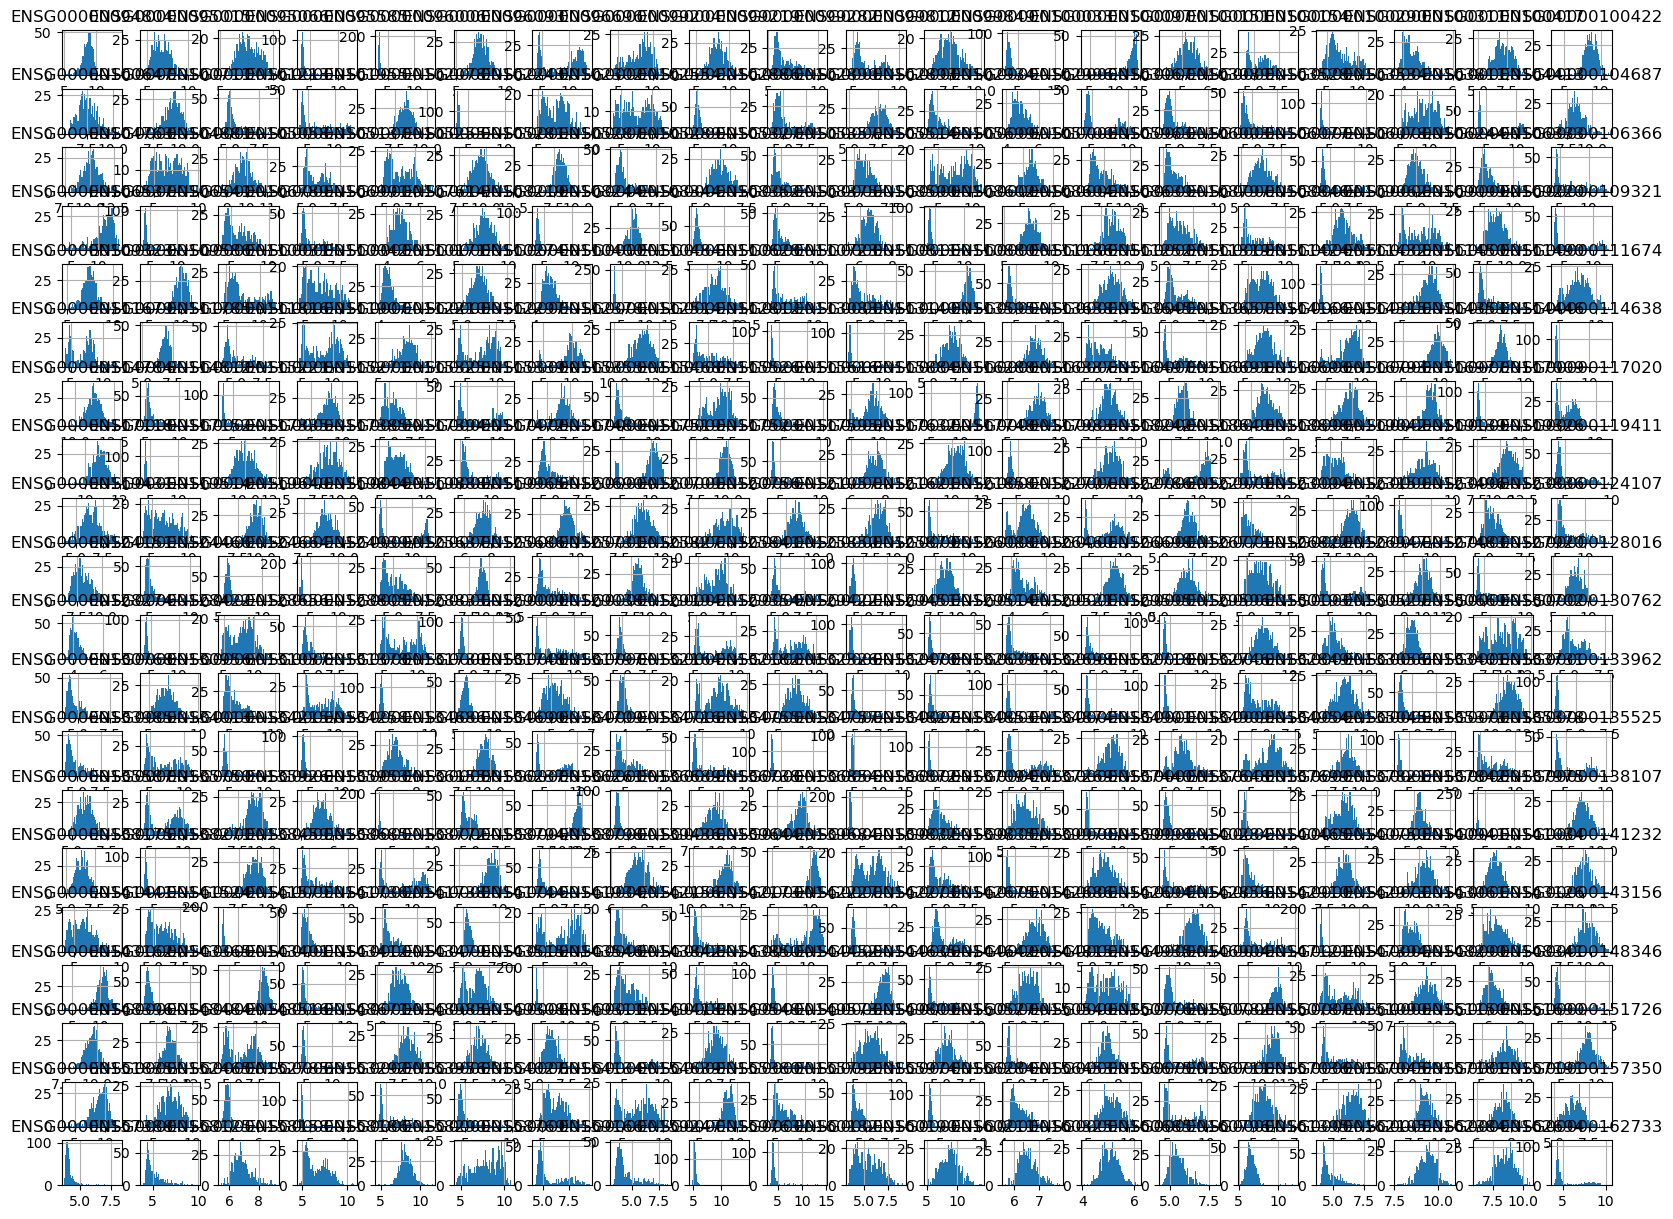

In [15]:
cmrna.iloc[:, 101:501].hist(bins=50, figsize=(20,15)) # There seems to be a lot of left and right skewed variables. Also variables with multiple peaks. 
plt.xlabel(None)
plt.ylabel(None)
plt.show()

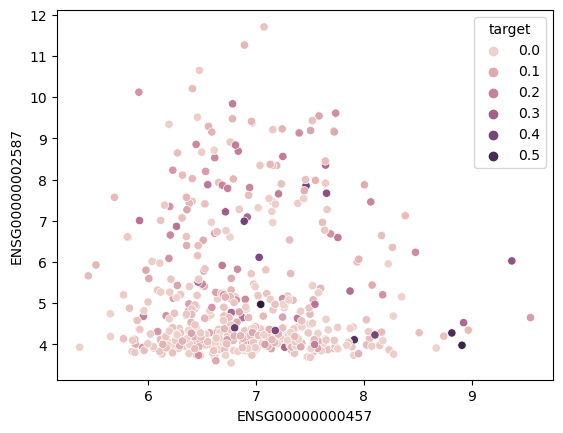

In [16]:
# Checking correlation between the first two variables. Seems to be no correlation. Dataset is large do I won't be visualizing all of the distributions at this point.
g = sns.scatterplot(x="ENSG00000000457", y="ENSG00000002587", hue="target", data=cmrna); 

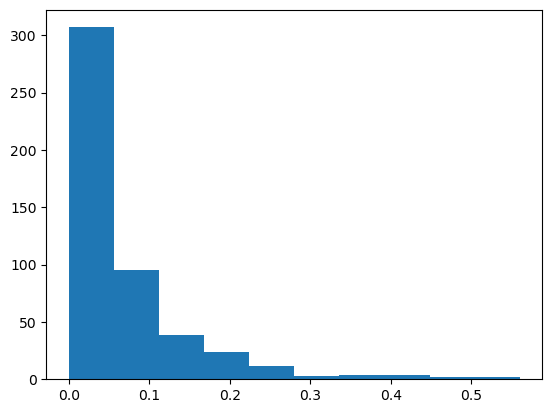

In [21]:
pyplot.hist(cmrna['target']) # Target variable seems to be right skewed.
pyplot.show()

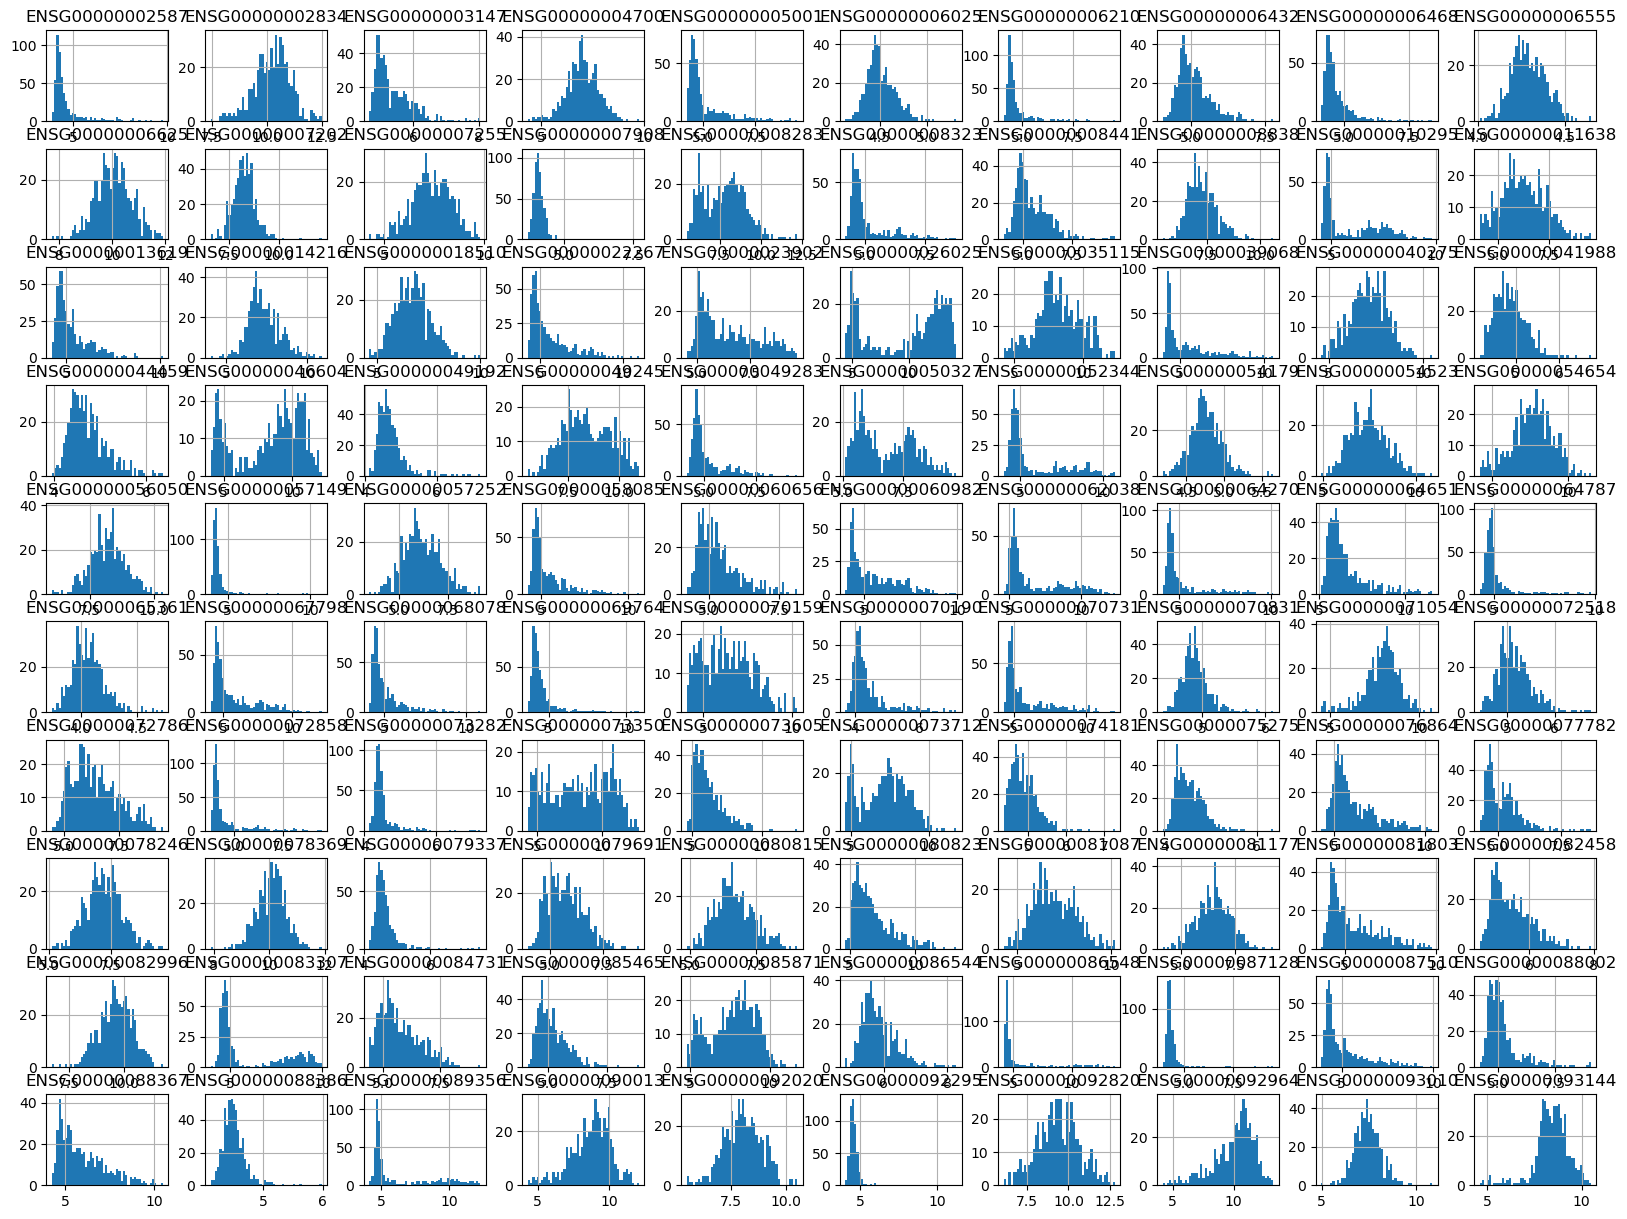

In [22]:
test_mrna.iloc[:, 1:101].hist(bins=50, figsize=(20,15)) # There seems to be a lot of left and right skewed variables. Also variables with multiple peaks and outliers. 
plt.xlabel(None)
plt.ylabel(None)
plt.show()

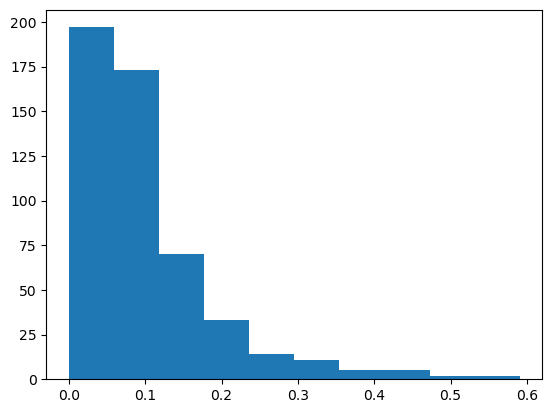

In [23]:
pyplot.hist(test_mrna['target']) # Target variable seems to be right skewed in the test set too.
pyplot.show()

### 2.5 Transforming the targets into a categorical variable <a id="section_2.5"></a>

* The target variable must be discretized into 2 separate categories: high and low sensitivity AUC scores. As there is no clear treshold for high and low sensitivity, the separation between the two classes can be arbitrary. 

In [329]:
def change_value(x):
    if x >= 0.1:
        return 'high sensitivity'
    else:
        return 'low sensitivity'

# Apply the custom function to column 'A'
cmrna['target'] = cmrna['target'].apply(change_value)

cmrna.head(1)

,ENSG00000000457,ENSG00000002587,ENSG00000002834,ENSG00000003147,ENSG00000004700,ENSG00000005001,ENSG00000006025,ENSG00000006210,ENSG00000006432,ENSG00000006468,...,ENSG00000171720,ENSG00000150768,ENSG00000223609,ENSG00000184254,ENSG00000142453,ENSG00000126767,ENSG00000110921,ENSG00000135902,ENSG00000147400,target
0,6.880135,3.848301,10.794302,4.690127,10.123447,4.445563,4.538893,4.615833,5.087315,6.975632,...,9.134503,9.589031,4.133893,4.788095,9.064122,6.506036,6.692598,3.742148,11.095846,low sensitivity


In [330]:
def change_value(x):
    if x >= 0.1:
        return 'high sensitivity'
    else:
        return 'low sensitivity'

# Apply the custom function to column 'A'
test_mrna['target'] = test_mrna['target'].apply(change_value)
test_mrna.head(1)

,ENSG00000000457,ENSG00000002587,ENSG00000002834,ENSG00000003147,ENSG00000004700,ENSG00000005001,ENSG00000006025,ENSG00000006210,ENSG00000006432,ENSG00000006468,...,ENSG00000171720,ENSG00000150768,ENSG00000223609,ENSG00000184254,ENSG00000142453,ENSG00000126767,ENSG00000110921,ENSG00000135902,ENSG00000147400,target
0,5.904857,4.220863,9.825718,5.831218,6.276092,4.458948,4.59126,5.439451,5.288703,4.581312,...,7.550823,7.292422,4.002888,5.129766,7.298302,5.009156,5.689873,4.249088,8.579019,low sensitivity


In [331]:
#Convert objects ('High sensitivity', 'Low sensitivity') to integers in TRAINING set

mappings = {
    'high sensitivity': int(1),
    'low sensitivity': int(0)}

cmrna['target_asnum'] = cmrna['target'].map(mappings)

#Convert objects ('High sensitivity', 'Low sensitivity') to integers in TEST set

mappings = {
    'high sensitivity': int(1),
    'low sensitivity': int(0)}

test_mrna['target_asnum'] = test_mrna['target'].map(mappings)

In [332]:
#Remove the target column

cmrna = cmrna.drop('target', axis=1)
test_mrna = test_mrna.drop('target', axis=1)
print(cmrna.head(1))
print(test_mrna.head(1))

   ENSG00000000457  ENSG00000002587  ENSG00000002834  ENSG00000003147  \
0         6.880135         3.848301        10.794302         4.690127   

   ENSG00000004700  ENSG00000005001  ENSG00000006025  ENSG00000006210  \
0        10.123447         4.445563         4.538893         4.615833   

   ENSG00000006432  ENSG00000006468  ...  ENSG00000171720  ENSG00000150768  \
0         5.087315         6.975632  ...         9.134503         9.589031   

   ENSG00000223609  ENSG00000184254  ENSG00000142453  ENSG00000126767  \
0         4.133893         4.788095         9.064122         6.506036   

   ENSG00000110921  ENSG00000135902  ENSG00000147400  target_asnum  
0         6.692598         3.742148        11.095846             0  

[1 rows x 789 columns]
   ENSG00000000457  ENSG00000002587  ENSG00000002834  ENSG00000003147  \
0         5.904857         4.220863         9.825718         5.831218   

   ENSG00000004700  ENSG00000005001  ENSG00000006025  ENSG00000006210  \
0         6.276092  

In [466]:
# Small number of 'high sensitive' variables causes big imbalance in case of target labels. Might have an affect to the quality of the model.
# This might be preventable by efficient dimension reduction and/or stratified test-train-splitting.
count_train = (cmrna['target_asnum'] == 1).sum() 
print(count_train)

count_test = (test_mrna['target_asnum'] == 1).sum() 
print(count_test)

98
177


### 2.6 Splitting the CCLE dataset into train and test sets <a id="section_2.6"></a>

Please note that the test set here is meant for internal validation, so withouth using the external dataset (GDSC). 

You can also do the splitting by using the cross-validation. In this case you will implement a nested cross validation (see coding exercises of the practical section focusing on regression tasks).

In [467]:
# first, we split the variables of the data set into predictors (X) and the target (y): TRAINING set
y = cmrna.loc[:,'target_asnum']
X = cmrna.drop(columns=['target_asnum'], inplace=False) 
# first, we split the variables of the data set into predictors (X) and the target (y): EXTERNAL TEST set
y_testset = test_mrna.loc[:,'target_asnum']
X_testset = test_mrna.drop(columns=['target_asnum'], inplace=False) 

In [468]:
# second, we split the TRAINING set into training and testing sets. We are using stratified splitting here because the number of high sensitive variables is so small compared to low sensitives.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [469]:
# Laske training-setin y=1 -muuttujien määrä
train_y_1_count = sum(y_train == 1)

# Laske testing-setin y=1 -muuttujien määrä
test_y_1_count = sum(y_test == 1)

print("Training setissä y=1 muuttujien määrä:", train_y_1_count)
print("Testing setissä y=1 muuttujien määrä:", test_y_1_count)


Training setissä y=1 muuttujien määrä: 78
Testing setissä y=1 muuttujien määrä: 20


Number of high sensitive variables is really small, causing imbalance between labels. Ways to solve this problem:
1. I could lower the treshold for the 'high sensitive' label. I don't like this approach, because the treshold is already quite low (0.1).
   I don't want to get good results, because I've been manipulating the dataset to my favour without legit reasoning (I think this is seen too much
   in the field of data-analysis). Might try this later if I have time to dive more deep into the theory behind scoring etc.  
2. Dimension reduction:
   - PCA and Collinearity analysis. I'll be performing model training and model prediction first using all the features, then using 
     only main components of PCA.
3. Oversampling:
   - I could generate more 'high sensitive' samples using i.e. bootstrap method.I won't be doing that. I'm using Random Forest as one classification method and it's 
     already utilizing bootsrap.
4. Evaluation metrics:
   - Evaluation metrics for this kind of situation:
     - Random Forest classifier:
        - Confusion Matrix
        - Recall/Sensitivity: We are more interested in True predicted positives here. 
        - AUC-PR
     - KNN:
     - Logistic Regression:
5. Stratified train-test-split
6. Model selection: 
   - I know that there are better classifiers for this task than the ones that I'm using (Logistic Regression and KNN vs. SVC and GBM).
     Excluded Random Forest classifier which is justified choise in this kind of case. Since this a project meant for learning I want to test KNN 
     and Logistic Regression. I think they might perform better than I'm assuming.

### 2.7 Checking/imputing missing values

In [166]:
total_missing_train = X_train.isnull().sum().sum()
total_cells_train = X_train.size
percentage_missing_train = (total_missing_train / total_cells_train) * 100
print("Total number of missing values in the training set:", total_missing_train, round(percentage_missing_train, 2), "%")

total_missing_test = X_test.isnull().sum().sum()
total_cells = X_test.size
percentage_missing_test = (total_missing_test / total_cells) * 100
print("Total number of missing values in the test set:", total_missing_test, round(percentage_missing_test, 2), "%")

total_missing_ytrain = y_train.isnull().sum().sum()
print("Total number of missing labels in the training set:", total_missing_ytrain)

total_missing_ytest = y_test.isnull().sum().sum()
print("Total number of missing labels in the test set:", total_missing_ytest)

Total number of missing values in the training set: 1947 0.63 %
Total number of missing values in the test set: 498 0.64 %
Total number of missing labels in the training set: 0
Total number of missing labels in the test set: 0


Only less than a percent is missing so we can impute the missing values. Let's use mean as a imputation method.

In [470]:
# I'm performing imputation separately for every set, because it's a way of preventing information leakage.
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_train)
X_train_imputed = imp.transform(X_train)

In [471]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_test)
X_test_imputed = imp.transform(X_test)

In [472]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_testset)
X_testset_imputed = imp.transform(X_testset)

In [475]:
# Imputed datasets are numpy arrays. I find dataframes easier to understand so I'm shifting arrays to dataframes. I don't think this is really
# necessary, because ML algorithms in sklearn can use (and sometimes prefer) np arrays.
columns_Xtrain = X.columns
X_train_imputed = pd.DataFrame(X_train_imputed, columns=columns_Xtrain)
columns_Xtest =  X_test.columns
X_test_imputed = pd.DataFrame(X_test_imputed, columns=columns_Xtest)
columns_Xtestset = X_testset.columns
X_testset_imputed = pd.DataFrame(X_testset_imputed, columns=columns_Xtestset)

Missing values have been imputed.
X_train_imputed: Dataframe containing the imputed values
X_test_imputed: Dataframe containing the imputed values

### 2.8 Scaling the data <a id="section_2.8"></a>

* The data should be scaled for principal component analysis and for better performance on the models. 

* Normality assumption for linear models is that the errors are independently and identically distributed. 

I'll be performing box cox-transformation for the datasets, since there are variety of left and right skewness in the datasets. 
Assumptions of Box cox-transformation: 
- Strictly positive values
- Independence of features -> I'm violating this rule, because later we'll see that there is a lot of correlation between feature variables. 
- Box cox is sensitive to outliers -> Yeo-Johnson might've been better. 

In [477]:
# I'll make copies of the imputed dataframes first.
X_train_copy = X_train_imputed.copy() 
X_test_copy = X_test_imputed.copy()
X_testset_copy = X_testset_imputed.copy()

In [478]:
# Box-cox transformation
from sklearn.preprocessing import power_transform 
X_train_copy = power_transform(X_train_copy, method='box-cox')
X_test_copy = power_transform(X_test_copy, method='box-cox')
X_testset_copy = power_transform(X_testset_copy, method='box-cox')

In [483]:
columns_train = X_train_imputed.columns
X_train_copy = pd.DataFrame(X_train_copy, columns=columns_train)
columns_test = X_test_imputed.columns
X_test_copy = pd.DataFrame(X_test_copy, columns=columns_test)
columns_testset = X_testset_imputed.columns
X_testset_copy = pd.DataFrame(X_testset_copy, columns=columns_testset)

## 3. Exploratory analysis <a id="section_3"></a>

### 3.1 PCA of CCLE and GDSC mRNA data <a id="section_3.1"></a>

Data has already been scaled so we can start the PCA-process right away.
First, I'm performing the PCA using 3 principal components and visualizing the result. 
In this section the collinearity analysis is still in progress so the final results will change later. I'm using feature selection by variance 
when executing the model training and evaluation. Results are not great, because of the lack of collinearity analysis.

In [291]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) 
x_pca = pca.fit_transform(X_train_copy)

In [292]:
print(x_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(393, 3)
[0.25127159 0.06915877 0.02771637]
0.3481467234470314


Following picture is from PCA (n_components=2)

Text(0, 0.5, 'Second component')

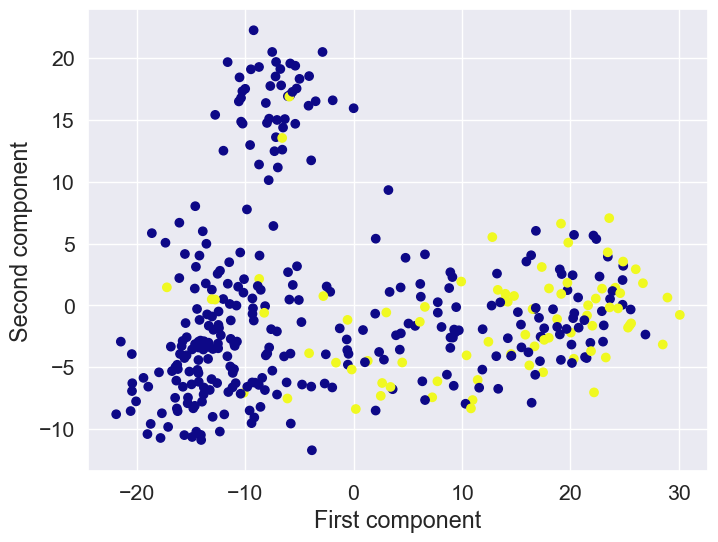

In [293]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1],c=y_train, cmap='plasma')
plt.xlabel('First component')
plt.ylabel('Second component')

From this picture we can see that high sensitive cases are mostly divided into the right side of the picture. But two components are not enough so we could 
clearly separate both classes from each other

<Axes: >

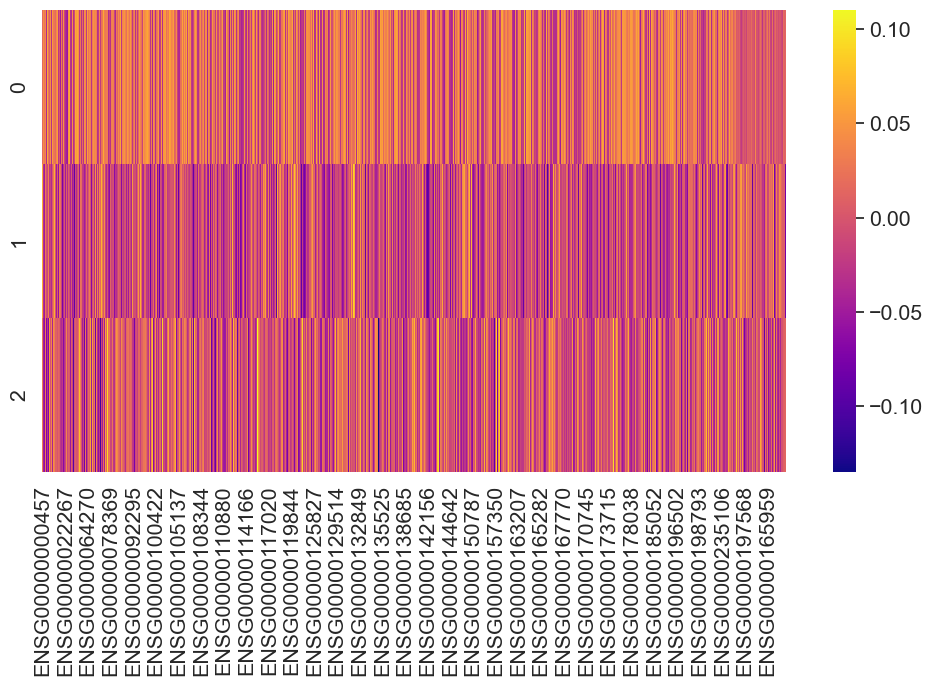

In [294]:
df_comp = pd.DataFrame(pca.components_, columns=X_train_copy.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')
           

This heatmap and the color bar basically represent the correlation between the various feature and the component itself.

Following visualization is done when PCA (n_components=3).

In [295]:
scores = pca.transform(X_train_copy)

In [296]:
scores_df = pd.DataFrame(scores, columns=['PCA1', 'PCA2', 'PCA3'])
scores_df

,PCA1,PCA2,PCA3
0,23.444666,3.939423,1.297535
1,-10.572175,16.499906,-3.365363
2,14.217136,0.292228,2.786346
3,12.794432,5.521218,7.498686
4,-16.061912,2.206760,6.224391
...,...,...,...
388,6.592888,-7.661789,-3.280753
389,22.333102,0.550029,2.285336
390,15.481481,-3.399900,-4.139475
391,-19.362004,-5.867405,3.603668


In [297]:
y_label = []
for i in y_train:
    if i == 0:
        y_label.append(0)
    elif i == 1:
        y_label.append(1)
        
labels = pd.DataFrame(y_label, columns=['labels'])

In [298]:
df_scores = pd.concat([scores_df, labels], axis=1)
df_scores

,PCA1,PCA2,PCA3,labels
0,23.444666,3.939423,1.297535,0
1,-10.572175,16.499906,-3.365363,0
2,14.217136,0.292228,2.786346,1
3,12.794432,5.521218,7.498686,1
4,-16.061912,2.206760,6.224391,0
...,...,...,...,...
388,6.592888,-7.661789,-3.280753,0
389,22.333102,0.550029,2.285336,1
390,15.481481,-3.399900,-4.139475,0
391,-19.362004,-5.867405,3.603668,0


In [310]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PCA1', 'PCA2', 'PCA3'], index=X_train_copy.columns)
df_loadings

,PCA1,PCA2,PCA3
ENSG00000000457,0.015740,0.064690,0.029548
ENSG00000002587,0.042942,-0.032389,-0.047048
ENSG00000002834,0.024188,-0.051233,-0.060251
ENSG00000003147,0.037532,0.025907,0.030255
ENSG00000004700,-0.038937,-0.004709,-0.071607
...,...,...,...
ENSG00000142453,-0.009416,0.015640,-0.002971
ENSG00000126767,-0.016250,0.007683,-0.001955
ENSG00000110921,0.018343,0.006497,0.008508
ENSG00000135902,0.009922,0.008371,0.010952


In [311]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.25127159, 0.06915877, 0.02771637])

In [280]:
import plotly.express as px

In [312]:
explained_variance = np.insert(explained_variance, 0, 0)

In [313]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [314]:
pc_df = pd.DataFrame(['','PCA1', 'PCA2', 'PCA3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [315]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PCA1,0.251272,0.251
2,PCA2,0.069159,0.320
3,PCA3,0.027716,0.348


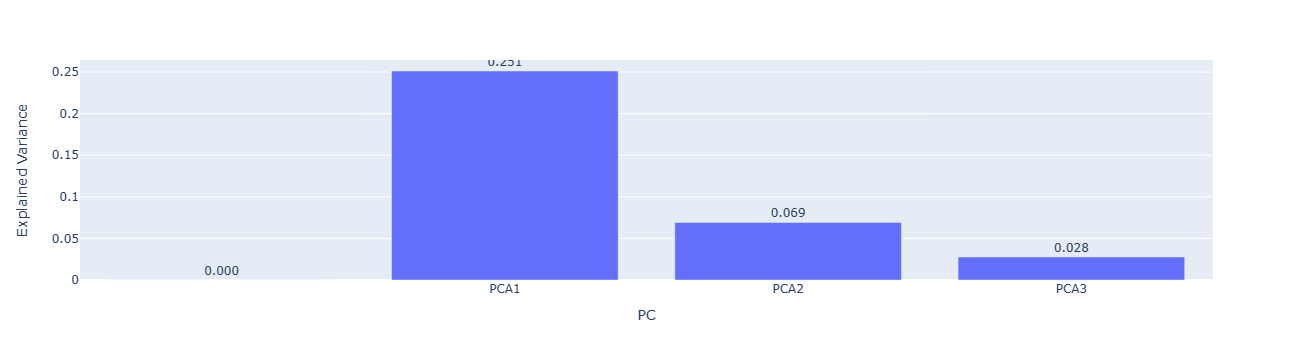

In [316]:
# https://plotly.com/python/bar-charts/

fig = px.bar(df_explained_variance, 
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

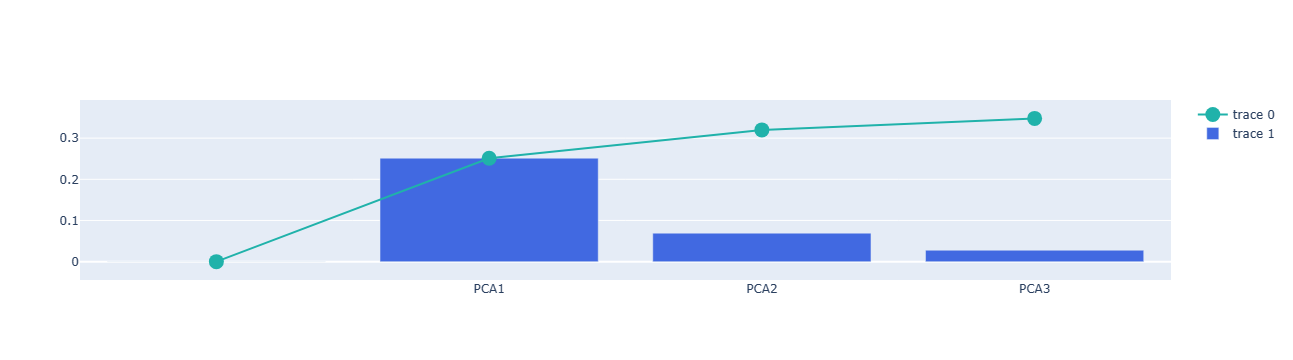

In [317]:
# https://plotly.com/python/creating-and-updating-figures/

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

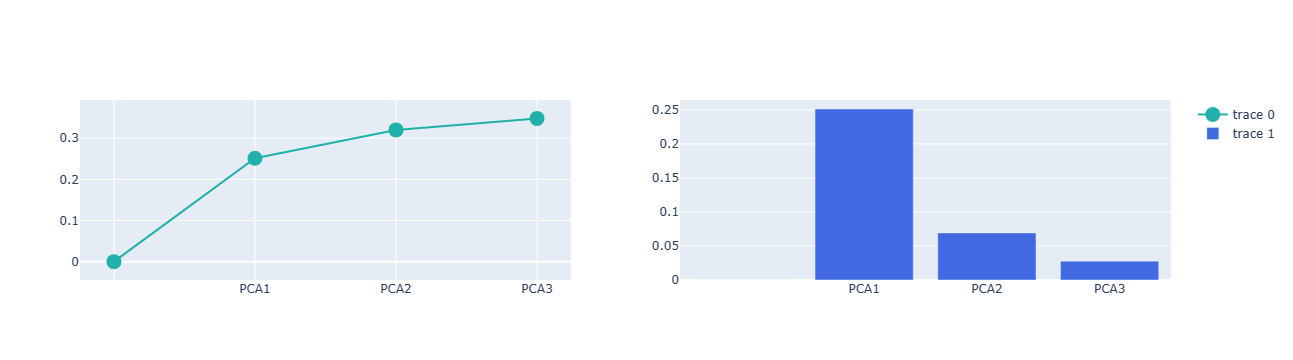

In [318]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ), row=1, col=1
    )

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue"),
    ), row=1, col=2
    )

fig.show()


In [320]:
import plotly.express as px

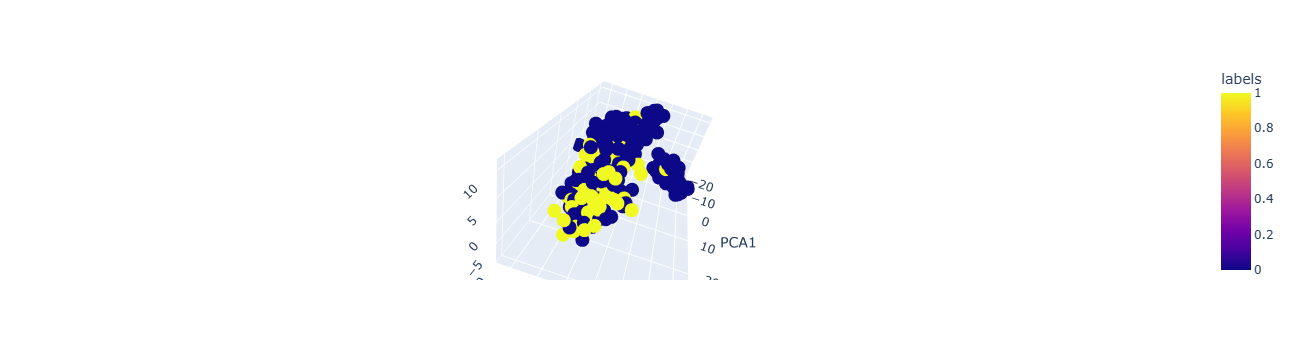

In [322]:
fig = px.scatter_3d(df_scores, x='PCA1', y='PCA2', z='PCA3',
              color='labels')

fig.show()

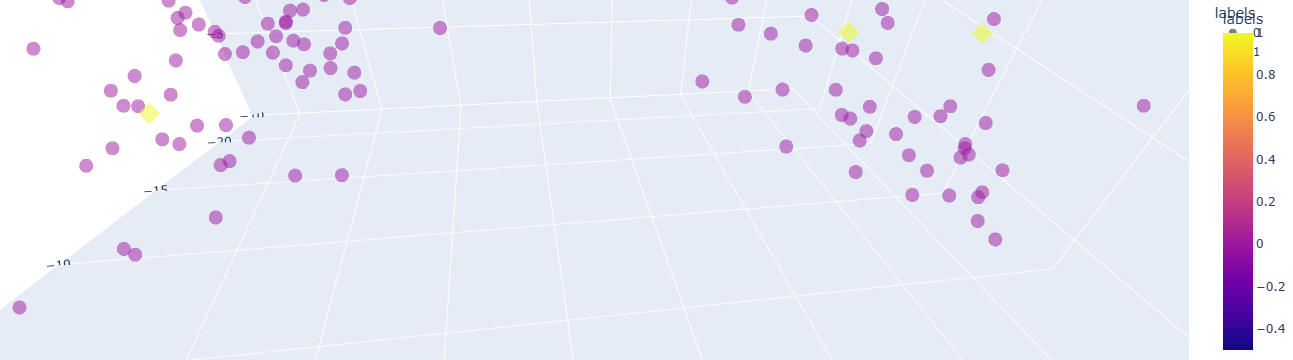

In [325]:
fig = px.scatter_3d(df_scores, x='PCA1', y='PCA2', z='PCA3',
              color='labels',
              symbol='labels',
              opacity=0.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

We can see that the targets are centered to one 'side' of the picture. I assume from this that there are many dependent feature variables in the dataset.
This will be taken into consideration in 'collinearity of feature variables'-part.

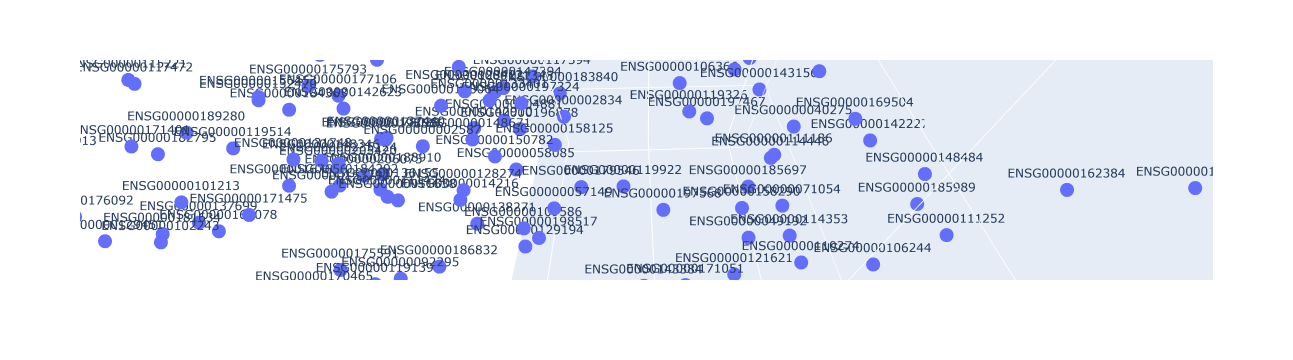

In [326]:
loadings_label = df_loadings.index
# loadings_label = df_loadings.index.str.strip(' (cm)')

fig = px.scatter_3d(df_loadings, x='PCA1', y='PCA2', z='PCA3',
                    text = loadings_label)

fig.show()

Here is feature selection done by using variance threshold. When doing the model evaluation we'll see that this approach doesn't perform well.

In [411]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(1))    
X = selection.fit_transform(X_train_copy)

In [412]:
X.shape

(393, 172)

In [413]:
y_train.shape

(393,)

In [414]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_train, test_size=0.3)

In [415]:
print(X.shape)
print(y_train.shape)

(393, 172)
(393,)


At this point I'll go to the nested k-cross validation. I have reduced the dimension of the original dataset (393,788) to (393,172).

### 3.2 Collinearity of the features in CCLE mRNA training data <a id="section_3.3"></a>

In [250]:
feature_names = X_train_copy.columns

<Axes: >

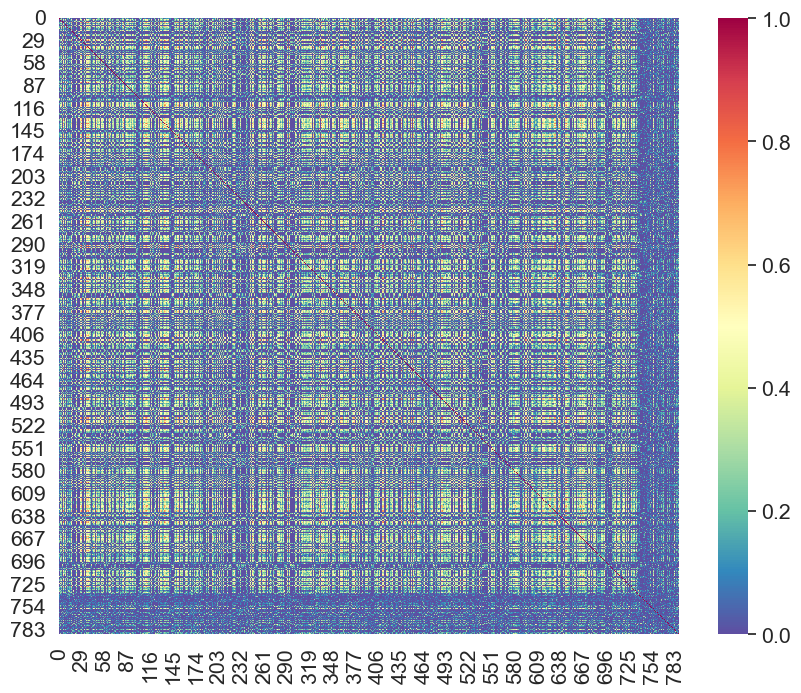

In [256]:
#x_axis_labels = data.columns[:-1]
cor=np.corrcoef(X_train_copy.T)
plt.figure(figsize=(10, 8))
axis_labels = feature_names
sns.heatmap(cor, vmin=0.0, vmax=1, cmap=plt.cm.Spectral_r)#, 
            #xticklabels=x_axis_labels, yticklabels=x_axis_labels)

There seems to be a lot of correlation between the predictor variables. This might be the main reason why models are learning so poorly.

In [242]:
feature_names

Index(['ENSG00000000457', 'ENSG00000002587', 'ENSG00000002834',
       'ENSG00000003147', 'ENSG00000004700', 'ENSG00000005001',
       'ENSG00000006025', 'ENSG00000006210', 'ENSG00000006432',
       'ENSG00000006468',
       ...
       'ENSG00000171720', 'ENSG00000150768', 'ENSG00000223609',
       'ENSG00000184254', 'ENSG00000142453', 'ENSG00000126767',
       'ENSG00000110921', 'ENSG00000135902', 'ENSG00000147400',
       'target_asnum'],
      dtype='object', length=789)

THIS PART OF THE PROJECT IS NOT FINISHED

In [244]:
# Let's create a correlation matrix
korrelaatiomatriisi = X_train_copy.corr()

In [245]:
korkeat_korrelaatiot = korrelaatiomatriisi.abs().stack().reset_index().sort_values(0, ascending=False)

In [246]:
korkeat_korrelaatiot = korkeat_korrelaatiot[korkeat_korrelaatiot['level_0'] != korkeat_korrelaatiot['level_1']]

In [247]:
print(korkeat_korrelaatiot)

                level_0          level_1         0
64949   ENSG00000083307  ENSG00000132698  0.906132
262486  ENSG00000132698  ENSG00000083307  0.906132
262439  ENSG00000132698  ENSG00000049283  0.884266
27913   ENSG00000049283  ENSG00000132698  0.884266
64651   ENSG00000083307  ENSG00000049283  0.882316
...                 ...              ...       ...
549849  ENSG00000198807  ENSG00000175352  0.000003
445083  ENSG00000169599  ENSG00000185989  0.000003
513552  ENSG00000185989  ENSG00000169599  0.000003
486151  ENSG00000176092  ENSG00000132274  0.000001
586100  ENSG00000132274  ENSG00000176092  0.000001

[620156 rows x 3 columns]


In [248]:
print(korkeat_korrelaatiot[:1])

               level_0          level_1         0
64949  ENSG00000083307  ENSG00000132698  0.906132


In [249]:
columns_kor = ['level_0', 'level_1', 0]

In [250]:
korrelaatiot = pd.DataFrame(korkeat_korrelaatiot, columns=columns_kor)

In [251]:
 korrelaatiot = korrelaatiot.rename(columns={0: 'korrelaatio'})

In [252]:
korrelaatiot

,level_0,level_1,korrelaatio
64949,ENSG00000083307,ENSG00000132698,0.906132
262486,ENSG00000132698,ENSG00000083307,0.906132
262439,ENSG00000132698,ENSG00000049283,0.884266
27913,ENSG00000049283,ENSG00000132698,0.884266
64651,ENSG00000083307,ENSG00000049283,0.882316
...,...,...,...
549849,ENSG00000198807,ENSG00000175352,0.000003
445083,ENSG00000169599,ENSG00000185989,0.000003
513552,ENSG00000185989,ENSG00000169599,0.000003
486151,ENSG00000176092,ENSG00000132274,0.000001


In [253]:
filtered_korrelaatiot = korrelaatiot.query('korrelaatio >= 0.6 or korrelaatio <= -0.6')  

In [254]:
filtered_korrelaatiot

,level_0,level_1,korrelaatio
64949,ENSG00000083307,ENSG00000132698,0.906132
262486,ENSG00000132698,ENSG00000083307,0.906132
262439,ENSG00000132698,ENSG00000049283,0.884266
27913,ENSG00000049283,ENSG00000132698,0.884266
64651,ENSG00000083307,ENSG00000049283,0.882316
...,...,...,...
222298,ENSG00000124466,ENSG00000083307,0.600042
156050,ENSG00000111450,ENSG00000026025,0.600037
20686,ENSG00000026025,ENSG00000111450,0.600037
323626,ENSG00000142227,ENSG00000167183,0.600026


In [255]:
filtered_korrelaatiot['järjestys'] = filtered_korrelaatiot.apply(lambda row: tuple(sorted([row[0], row[1]])), axis=1)

C:\Users\evema\AppData\Local\Temp\ipykernel_15272\999539552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_korrelaatiot['järjestys'] = filtered_korrelaatiot.apply(lambda row: tuple(sorted([row[0], row[1]])), axis=1)


In [256]:
filtered_korrelaatiot.drop_duplicates(subset='järjestys', keep='first', inplace=True)

C:\Users\evema\AppData\Local\Temp\ipykernel_15272\523692489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_korrelaatiot.drop_duplicates(subset='järjestys', keep='first', inplace=True)


In [257]:
filtered_korrelaatiot.drop(columns=['järjestys'], inplace=True)


C:\Users\evema\AppData\Local\Temp\ipykernel_15272\780259385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_korrelaatiot.drop(columns=['järjestys'], inplace=True)


In [258]:
correlations_test = korrelaatiot[[korrelaatiot.columns[0], korrelaatiot.columns[2]]]

In [259]:
correlations_test

,level_0,korrelaatio
64949,ENSG00000083307,0.906132
262486,ENSG00000132698,0.906132
262439,ENSG00000132698,0.884266
27913,ENSG00000049283,0.884266
64651,ENSG00000083307,0.882316
...,...,...
549849,ENSG00000198807,0.000003
445083,ENSG00000169599,0.000003
513552,ENSG00000185989,0.000003
486151,ENSG00000176092,0.000001


In [260]:
correlations_test.reset_index(drop=True, inplace=True)

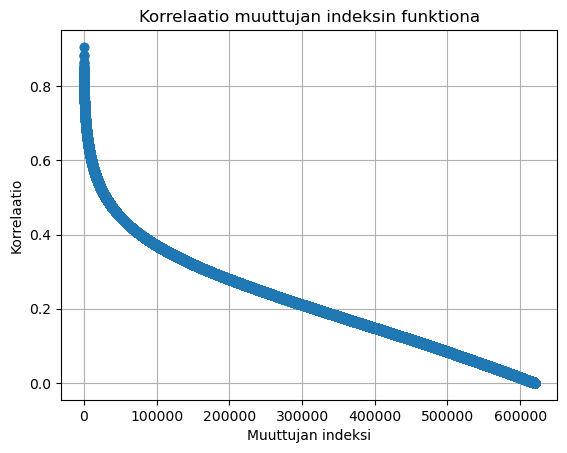

In [261]:
plt.plot(correlations_test.index, correlations_test['korrelaatio'], marker='o', linestyle='-')
plt.title('Korrelaatio muuttujan indeksin funktiona')
plt.xlabel('Muuttujan indeksi')
plt.ylabel('Korrelaatio')
plt.grid(True)
plt.show()

It seems almost of the features correlate with some other feature. Let's try to indentify and remove features that are correlating with 'ENSG00000083307'
= index 0.

In [262]:
correlation_with_ENSG00000083307 = korrelaatiomatriisi['ENSG00000083307']

In [263]:
strong_correlation_ENSG00000083307 = correlation_with_ENSG00000083307[abs(correlation_with_ENSG00000083307) > 0.8]

In [264]:
print("Muuttujat, jotka korreloivat vahvasti tietyn muuttujan kanssa:")
print(strong_correlation_ENSG00000083307)

Muuttujat, jotka korreloivat vahvasti tietyn muuttujan kanssa:
ENSG00000049283    0.882316
ENSG00000052344    0.833085
ENSG00000064270    0.809925
ENSG00000083307    1.000000
ENSG00000117595    0.848631
ENSG00000125850    0.812606
ENSG00000132698    0.906132
ENSG00000149418    0.805775
ENSG00000172818    0.838106
ENSG00000182107    0.814993
Name: ENSG00000083307, dtype: float64


Let's remove these features and keep ENSG00000083307

In [265]:
# Saadaan vahvojen korrelaatioiden muuttujien nimet listana
vahvat_korrelaatiot_nimet = list(strong_correlation_ENSG00000083307.index)

print("Vahvat korrelaatiot muuttujien nimet:")
print(vahvat_korrelaatiot_nimet)

Vahvat korrelaatiot muuttujien nimet:
['ENSG00000049283', 'ENSG00000052344', 'ENSG00000064270', 'ENSG00000083307', 'ENSG00000117595', 'ENSG00000125850', 'ENSG00000132698', 'ENSG00000149418', 'ENSG00000172818', 'ENSG00000182107']


In [266]:
X_train_copy = X_train_copy.drop(columns=vahvat_korrelaatiot_nimet)

print("DataFrame ilman vahvoja korrelaatioita:")
print(X_train_copy)

DataFrame ilman vahvoja korrelaatioita:
     ENSG00000000457  ENSG00000002587  ENSG00000002834  ENSG00000003147  \
0          -0.604459        -1.523340        -0.231910         0.295683   
1           1.055118        -1.122717         0.990168         0.192545   
2          -0.776009        -1.420935         0.528905        -0.349786   
3          -0.027303        -1.258789        -1.356058         0.890633   
4          -1.257892        -0.931019        -0.546353         0.204851   
..               ...              ...              ...              ...   
388         1.628055        -0.684632        -0.877756        -1.339366   
389         0.641200         1.537148        -0.613921         0.040754   
390        -0.667606        -0.201671         0.286379         0.805694   
391         1.171600        -0.707391        -0.333238         0.310082   
392        -0.496962        -1.000527        -0.091230        -0.702846   

     ENSG00000004700  ENSG00000005001  ENSG00000006025  ENS

In [267]:
print(X_train_copy.shape)

(393, 778)


In [268]:
print(X_test_copy.shape)

(99, 788)


Let's do the PCA again

This section will be done when the collinearity part is done. After that, the following model training, validation and testing will be executed again with 
fixed datasets.

## 4. Model training, validation and testing <a id="section_4"></a>

Here I'm performing nested K-cross validation using original TRAINING set (No dimension reduction done here).

In [361]:
# Random Forest classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# create dataset
X, y = X, y_train

# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
 # split data
 X_train, X_test = X[train_ix, :], X[test_ix, :]
 y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
 # configure the cross-validation procedure
 cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
 # define the model
 model = RandomForestClassifier(random_state=1, class_weight='balanced')
 # define search space
 param_grid = {
        'n_estimators': [200, 500, 600],
        'max_features': [10, 50, 100]
    }
    
 # define search
 search = GridSearchCV(model, param_grid, scoring='recall', cv=3, refit=True)
 # execute search
 result = search.fit(X_train, y_train)
 # get the best performing model fit on the whole training set
 best_model = result.best_estimator_
 # evaluate model on the hold out dataset
 yhat = best_model.predict(X_test)
 # evaluate the model using multiple metrics
 accuracy = accuracy_score(y_test, yhat)
 precision = precision_score(y_test, yhat)
 recall = recall_score(y_test, yhat)
 f1 = f1_score(y_test, yhat)
 #auc_roc = roc_auc_score(y_test, yhat)
 # store the result
 outer_results.append((accuracy, precision, recall, f1))
 # report progress
 print('> accuracy=%.3f, precision=%.3f, recall=%.3f, f1=%.3f, best_params=%s' % (accuracy, precision, recall, f1, result.best_params_))
# summarize the estimated performance of the model
outer_results = pd.DataFrame(outer_results, columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])
print('Accuracy: %.3f, Precision: %.3f, Recall: %.3f, F1-score: %.3f' % (
    mean(outer_results['Accuracy']), mean(outer_results['Precision']), 
    mean(outer_results['Recall']), mean(outer_results['F1-score'])))

> accuracy=0.835, precision=0.556, recall=0.357, f1=0.435, best_params={'max_features': 100, 'n_estimators': 200}
> accuracy=0.785, precision=0.750, recall=0.158, f1=0.261, best_params={'max_features': 100, 'n_estimators': 500}
> accuracy=0.873, precision=0.571, recall=0.364, f1=0.444, best_params={'max_features': 50, 'n_estimators': 500}
> accuracy=0.808, precision=0.750, recall=0.316, f1=0.444, best_params={'max_features': 100, 'n_estimators': 200}
> accuracy=0.833, precision=0.667, recall=0.267, f1=0.381, best_params={'max_features': 100, 'n_estimators': 200}
Accuracy: 0.827, Precision: 0.659, Recall: 0.292, F1-score: 0.393


In [383]:
# KNN
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy import sparse

# Olettaen, että X_train_copy on DataFrame
#X_sparse = sparse.csr_matrix(X_train_copy.values)
# create dataset
X, y = X, y_train

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
 # split data
 X_train, X_test = X[train_ix, :], X[test_ix, :]
 y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
 # configure the cross-validation procedure
 cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
 # define the model
 model = KNeighborsClassifier(weights='distance')  # Asetetaan weights='distance'
 # define search space
 space = dict()
 space['n_neighbors'] = [3, 5, 7]
 space['p'] = [1, 2, 3]  # p-parametri lisätty
 space['metric'] = ['euclidean']  # Changed to use Euclidean distance
 # define search
 search = GridSearchCV(model, space, scoring='f1', cv=cv_inner, refit=True)
 # execute search
 result = search.fit(X_train, y_train)
 # get the best performing model fit on the whole training set
 best_model = result.best_estimator_
 # evaluate model on the hold out dataset
 yhat = best_model.predict(X_test)
 # evaluate the model
 acc = accuracy_score(y_test, yhat)
 precision = precision_score(y_test, yhat)
 recall = recall_score(y_test, yhat)
 f1 = f1_score(y_test, yhat)
 # store the result
 outer_results.append((acc, precision, recall, f1))
 # report progress
 print('> acc=%.3f, precision=%.3f, recall=%.3f, f1=%.3f, est=%.3f, cfg=%s' % 
    (acc, precision, recall, f1, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
outer_results = pd.DataFrame(outer_results, columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])
print('Accuracy: %.3f, Precision: %.3f, Recall: %.3f, F1-score: %.3f' % (
mean(outer_results['Accuracy']), mean(outer_results['Precision']), 
mean(outer_results['Recall']), mean(outer_results['F1-score'])))

> acc=0.810, precision=0.467, recall=0.500, f1=0.483, est=0.486, cfg={'metric': 'euclidean', 'n_neighbors': 5, 'p': 1}
> acc=0.785, precision=0.571, recall=0.421, f1=0.485, est=0.550, cfg={'metric': 'euclidean', 'n_neighbors': 3, 'p': 1}
> acc=0.785, precision=0.385, recall=0.909, f1=0.541, est=0.533, cfg={'metric': 'euclidean', 'n_neighbors': 3, 'p': 1}
> acc=0.769, precision=0.533, recall=0.421, f1=0.471, est=0.440, cfg={'metric': 'euclidean', 'n_neighbors': 3, 'p': 1}
> acc=0.833, precision=0.625, recall=0.333, f1=0.435, est=0.507, cfg={'metric': 'euclidean', 'n_neighbors': 7, 'p': 1}
Accuracy: 0.796, Precision: 0.516, Recall: 0.517, F1-score: 0.483


In [416]:
# Logistic Regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import sparse

# Olettaen, että X_train_copy on DataFrame
#X_sparse = sparse.csr_matrix(X_train_copy.values)
# create dataset
X, y = X, y_train

# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
 # split data
 X_train, X_test = X[train_ix, :], X[test_ix, :]
 y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
 # configure the cross-validation procedure
 cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
 # define the model
 model = LogisticRegression(max_iter=1000)  # Increased max_iter
 # define search space
 space = dict()
 space['C'] = [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization parameter
 space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']  # Algorithm to use in the optimization problem
 space['penalty'] = ['l2']  # Regularization norm
 # define search
 search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
 # execute search
 result = search.fit(X_train, y_train)
 # get the best performing model fit on the whole training set
 best_model = result.best_estimator_
 # evaluate model on the hold out dataset
 yhat = best_model.predict(X_test)
 # evaluate the model using multiple metrics
 accuracy = accuracy_score(y_test, yhat)
 precision = precision_score(y_test, yhat)
 recall = recall_score(y_test, yhat)
 f1 = f1_score(y_test, yhat)
 # store the result
 outer_results.append((accuracy, precision, recall, f1))
 # report progress
 print('> Accuracy=%.3f, Precision=%.3f, Recall=%.3f, F1=%.3f, Best_params=%s' % (accuracy, precision, recall, f1, result.best_params_))
# summarize the estimated performance of the model
outer_results = pd.DataFrame(outer_results, columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])
print('Accuracy: %.3f, Precision: %.3f, Recall: %.3f, F1-score: %.3f' % (
    mean(outer_results['Accuracy']), mean(outer_results['Precision']), 
    mean(outer_results['Recall']), mean(outer_results['F1-score'])))

> Accuracy=0.842, Precision=0.714, Recall=0.417, F1=0.526, Best_params={'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
> Accuracy=0.839, Precision=1.000, Recall=0.250, F1=0.400, Best_params={'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
> Accuracy=0.857, Precision=0.750, Recall=0.300, F1=0.429, Best_params={'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
> Accuracy=0.857, Precision=0.600, Recall=0.333, F1=0.429, Best_params={'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
> Accuracy=0.839, Precision=0.714, Recall=0.417, F1=0.526, Best_params={'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
> Accuracy=0.786, Precision=0.400, Recall=0.182, F1=0.250, Best_params={'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
> Accuracy=0.786, Precision=0.500, Recall=0.250, F1=0.333, Best_params={'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.829, Precision: 0.668, Recall: 0.307, F1-score: 0.413


I have used nested k-fold cross validation to all of the three classifiers (Random Forest, KNN and Logistic Regression)
Here are the results.

Random Forest:
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 100}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=0.923, est=0.987, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 100}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=0.923, est=0.987, cfg={'max_features': 5, 'n_estimators': 100}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=0.923, est=0.987, cfg={'max_features': 5, 'n_estimators': 10}
>acc=0.923, est=0.987, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 100}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=1.000, est=0.984, cfg={'max_features': 5, 'n_estimators': 10}
>acc=0.846, est=0.990, cfg={'max_features': 5, 'n_estimators': 10}
Accuracy: 0.985 (0.037)

KNN:
>acc=1.000, est=0.979, cfg={'metric': 'manhattan', 'n_neighbors': 5, 'p': 1}
>acc=0.982, est=0.982, cfg={'metric': 'manhattan', 'n_neighbors': 3, 'p': 1}
>acc=0.982, est=0.985, cfg={'metric': 'manhattan', 'n_neighbors': 7, 'p': 1}
>acc=0.982, est=0.982, cfg={'metric': 'manhattan', 'n_neighbors': 7, 'p': 1}
>acc=0.964, est=0.988, cfg={'metric': 'manhattan', 'n_neighbors': 3, 'p': 1}
>acc=1.000, est=0.985, cfg={'metric': 'manhattan', 'n_neighbors': 3, 'p': 1}
>acc=0.964, est=0.991, cfg={'metric': 'manhattan', 'n_neighbors': 3, 'p': 1}
Accuracy: 0.982 (0.013)

Logistic Regression:
>acc=1.000, est=0.982, cfg={'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
>acc=1.000, est=0.982, cfg={'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
>acc=0.982, est=0.985, cfg={'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
>acc=0.982, est=0.985, cfg={'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
>acc=0.964, est=0.988, cfg={'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
>acc=1.000, est=0.982, cfg={'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
>acc=0.964, est=0.988, cfg={'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.985 (0.015)

All of the above performed well in case of the TRAINING data. But I think it's still a problem, that the number of 'high sensitive'-labels is so small. 
Next I will be testing these classifiers with the TEST set using hyperparameters:

Random Forest: 
>acc=0.923, est=0.987, cfg={'max_features': 5, 'n_estimators': 10}

KNN:
>acc=0.964, est=0.991, cfg={'metric': 'manhattan', 'n_neighbors': 3, 'p': 1}

Logistic Regression:
>acc=0.964, est=0.988, cfg={'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}

In [593]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier(max_features = 5, n_estimators = 10)
rf_cls = rf_cls.fit(X_train_copy, y_train)

In [594]:
from sklearn import metrics

result = rf_cls.predict(X_train_copy)
print(metrics.accuracy_score(y_train, result))

0.9974554707379135


In [610]:
accuracy = metrics.accuracy_score(y_test, rf_cls.predict(X_test_copy))
print(accuracy)

0.98989898989899


In [617]:
from sklearn import metrics

result = knn_cls.predict(X_train_copy.values)
print(metrics.accuracy_score(y_train, result))

0.9847328244274809


In [ ]:
accuracy = metrics.accuracy_score(y_test, knn_cls.predict(X_test_copy.values))
print(accuracy)

In [622]:
from sklearn.linear_model import LogisticRegression

lr_cls = LogisticRegression(C=0.001, penalty='l2', solver='newton-cg')
lr_cls = lr_cls.fit(X_train_copy, y_train)

In [623]:
from sklearn import metrics

result = lr_cls.predict(X_train_copy)
print(metrics.accuracy_score(y_train, result))

0.9847328244274809


In [624]:
accuracy = metrics.accuracy_score(y_test, lr_cls.predict(X_test_copy))
print(accuracy)

0.98989898989899


All of the three classifiers performs great with the TEST set. Time to see the performance when using the EXTERNAL TEST set:
First, I have to train the Random Forest classifier using the WHOLE CMRNA DATASET as a training set.

In [31]:
# I have the original cmrna dataset divided into predictors (X) and target (y). Preprocessing hasn't been done to X yet, so I need to prepare
# like I did earlier, but without further division into test and training sets.
# First, I need to imputate missing values of the predictors. Then I need to scale the predictor dataset.
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X_imputed = imp.transform(X)

In [32]:
# Scaling:
# Box-cox transformation
from sklearn.preprocessing import power_transform 
X_imputed = power_transform(X_imputed, method='box-cox')

In [35]:
# EXTERNAL TEST SET: External test has been already divided into predictors (X) and target (y), imputated, scaled and converted to a dataframe.
X_testset = X_testset_copy
y_testset = y_testset

Then, I need to convert training set from Numpy array to Pandas dataframe: 

In [36]:
Then, I need to convert training set from Numpy array to Pandas dataframe: 
# Extracting column names and convertion into dataframe:
columns_X = X.columns
X_copy = pd.DataFrame(X_imputed, columns=columns_X)

Then, I will train the first model (Random Forest Classifier) using the whole CMRNA (X_copy) as a TRAINING dataset:

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier(max_features = 5, n_estimators = 10)
rf_cls = rf_cls.fit(X_copy, y)

TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'metric'

Now I will be doing prediction for the EXTERNAL TEST set and counting the accuracy of the prediction:

In [40]:
from sklearn import metrics

PredRF_external = rf_cls.predict(X_testset)
accuracy = metrics.accuracy_score(y_testset, PredRF_external)
print(accuracy)

0.978515625


In [42]:
from sklearn.metrics import confusion_matrix

# Assuming you have your test labels (actual) and predicted labels from Random Forest (predicted)
# y_test_actual: Actual labels from the test dataset
# y_pred_rf: Predicted labels from the Random Forest model

# Create confusion matrix
cm = confusion_matrix(y_testset, PredRF_external)

# Display confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[501   0]
 [ 11   0]]


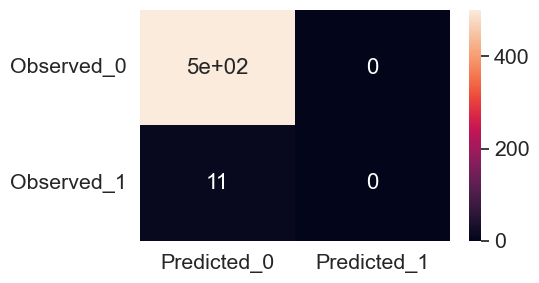

In [43]:
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (5,3))
sns.set(font_scale = 1.4) # for label size
sns.heatmap(df_cm, annot = True, annot_kws = {"size": 16}, # font size
            yticklabels = ["Observed_0","Observed_1"], 
            xticklabels = ["Predicted_0","Predicted_1"]) 

plt.show()

Seems like model hasn't learn how to predict high sensitive cases. Like I mentioned earlier, I still think the problem is the imbalance between labels.
I think I need to do the nested K-cross validation again and tune the parameter space values.
I won't count any further evaluation metrics for this one because I wan't to see first how the other algorithms perform. I'll get back to this later. 
Next, I'm gonna train KNN and test it with the EXTERNAL TEST set. Just like I did above. 

In [46]:
from sklearn.neighbors import KNeighborsClassifier

KNN_cls = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 3, p=1)
KNN_cls = KNN_cls.fit(X_copy, y)

In [48]:
from sklearn import metrics

PredKNN_external = KNN_cls.predict(X_testset.values)
accuracy = metrics.accuracy_score(y_testset, PredKNN_external)
print(accuracy)

C:\Users\evema\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.98046875


In [50]:
from sklearn.metrics import confusion_matrix

# Assuming you have your test labels (actual) and predicted labels from Random Forest (predicted)
# y_test_actual: Actual labels from the test dataset
# y_pred_rf: Predicted labels from the Random Forest model

# Create confusion matrix
cm = confusion_matrix(y_testset, PredKNN_external)

# Display confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[501   0]
 [ 10   1]]


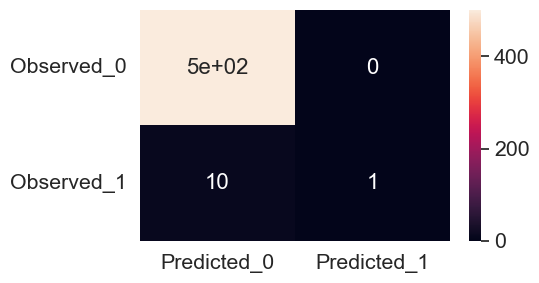

In [51]:
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (5,3))
sns.set(font_scale = 1.4) # for label size
sns.heatmap(df_cm, annot = True, annot_kws = {"size": 16}, # font size
            yticklabels = ["Observed_0","Observed_1"], 
            xticklabels = ["Predicted_0","Predicted_1"]) 

plt.show()

KNN found one correct high-sensitive case. A little bit better than the Random Forest cls, but still not good. I'm not using the results of PCA here and
I have a feeling that the quality of the models will get better when using PCA-components instead of the whole dataset. But let's see the last one: 
Linear Regression Classifier.

In [53]:
from sklearn.linear_model import LogisticRegression

lr_cls = LogisticRegression(C=0.001, penalty='l2', solver='newton-cg')
lr_cls = lr_cls.fit(X_copy, y)

In [54]:
from sklearn import metrics

PredLR_external = lr_cls.predict(X_testset.values)
accuracy = metrics.accuracy_score(y_testset, PredLR_external)
print(accuracy)

0.978515625


C:\Users\evema\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [55]:
from sklearn.metrics import confusion_matrix

# Assuming you have your test labels (actual) and predicted labels from Random Forest (predicted)
# y_test_actual: Actual labels from the test dataset
# y_pred_rf: Predicted labels from the Random Forest model

# Create confusion matrix
cm = confusion_matrix(y_testset, PredLR_external)

# Display confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[501   0]
 [ 11   0]]


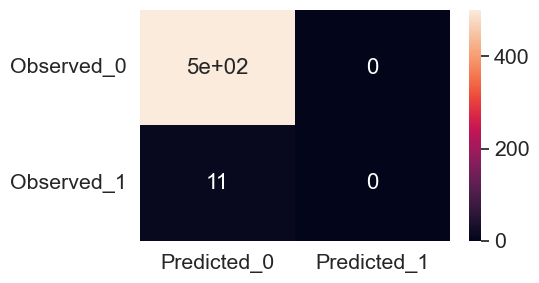

In [56]:
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (5,3))
sns.set(font_scale = 1.4) # for label size
sns.heatmap(df_cm, annot = True, annot_kws = {"size": 16}, # font size
            yticklabels = ["Observed_0","Observed_1"], 
            xticklabels = ["Predicted_0","Predicted_1"]) 

plt.show()

I obviously can't use these models any further. Next steps are:
1. Tune the nested K-cross validation functions and try to make them better. I have a feeling that I'm not using a right way to find 
   the 'best' hyperparameters.
2. Dive deeper into the PCA-process and do the dimension reduction. 

1. I tuned the nKcv function and reduced the treshold of sensitiveness from 0.4 to 0.1.
Here are the results:
Random Forest:
Ajo1:
> accuracy=0.861, precision=0.714, recall=0.357, f1=0.476, best_params={'max_depth': 10, 'max_features': 100, 'n_estimators': 300}
> accuracy=0.772, precision=1.000, recall=0.053, f1=0.100, best_params={'max_depth': 10, 'max_features': 50, 'n_estimators': 100}
> accuracy=0.899, precision=0.714, recall=0.455, f1=0.556, best_params={'max_depth': 10, 'max_features': 10, 'n_estimators': 200}
> accuracy=0.821, precision=0.857, recall=0.316, f1=0.462, best_params={'max_depth': 10, 'max_features': 50, 'n_estimators': 100}
> accuracy=0.795, precision=0.400, recall=0.133, f1=0.200, best_params={'max_depth': 10, 'max_features': 100, 'n_estimators': 200}
Accuracy: 0.829, Precision: 0.737, Recall: 0.263, F1-score: 0.359

Ajo2:
> accuracy=0.861, precision=0.800, recall=0.286, f1=0.421, best_params={'max_features': 10, 'n_estimators': 300}
> accuracy=0.785, precision=1.000, recall=0.105, f1=0.190, best_params={'max_features': 5, 'n_estimators': 200}
> accuracy=0.873, precision=0.600, recall=0.273, f1=0.375, best_params={'max_features': 5, 'n_estimators': 200}
> accuracy=0.808, precision=1.000, recall=0.211, f1=0.348, best_params={'max_features': 10, 'n_estimators': 500}
> accuracy=0.821, precision=0.600, recall=0.200, f1=0.300, best_params={'max_features': 10, 'n_estimators': 200}
Accuracy: 0.829, Precision: 0.800, Recall: 0.215, F1-score: 0.327

Ajo3: Kokeilen skaalaamattomalla datalla
> accuracy=0.848, precision=0.667, recall=0.286, f1=0.400, best_params={'max_features': 100, 'n_estimators': 500}
> accuracy=0.772, precision=1.000, recall=0.053, f1=0.100, best_params={'max_features': 100, 'n_estimators': 500}
> accuracy=0.886, precision=0.667, recall=0.364, f1=0.471, best_params={'max_features': 50, 'n_estimators': 600}
> accuracy=0.833, precision=1.000, recall=0.316, f1=0.480, best_params={'max_features': 50, 'n_estimators': 600}
> accuracy=0.795, precision=0.400, recall=0.133, f1=0.200, best_params={'max_features': 100, 'n_estimators': 200}
Accuracy: 0.827, Precision: 0.747, Recall: 0.230, F1-score: 0.330

Ajo4: After dimension reduction:
> accuracy=0.835, precision=0.556, recall=0.357, f1=0.435, best_params={'max_features': 100, 'n_estimators': 200}
> accuracy=0.785, precision=0.750, recall=0.158, f1=0.261, best_params={'max_features': 100, 'n_estimators': 500}
> accuracy=0.873, precision=0.571, recall=0.364, f1=0.444, best_params={'max_features': 50, 'n_estimators': 500}
> accuracy=0.808, precision=0.750, recall=0.316, f1=0.444, best_params={'max_features': 100, 'n_estimators': 200}
> accuracy=0.833, precision=0.667, recall=0.267, f1=0.381, best_params={'max_features': 100, 'n_estimators': 200}
Accuracy: 0.827, Precision: 0.659, Recall: 0.292, F1-score: 0.393

KNN:

Ajo1: After dimension reduction:
> acc=0.810, precision=0.467, recall=0.500, f1=0.483, est=0.486, cfg={'metric': 'euclidean', 'n_neighbors': 5, 'p': 1}
> acc=0.785, precision=0.571, recall=0.421, f1=0.485, est=0.550, cfg={'metric': 'euclidean', 'n_neighbors': 3, 'p': 1}
> acc=0.785, precision=0.385, recall=0.909, f1=0.541, est=0.533, cfg={'metric': 'euclidean', 'n_neighbors': 3, 'p': 1}
> acc=0.769, precision=0.533, recall=0.421, f1=0.471, est=0.440, cfg={'metric': 'euclidean', 'n_neighbors': 3, 'p': 1}
> acc=0.833, precision=0.625, recall=0.333, f1=0.435, est=0.507, cfg={'metric': 'euclidean', 'n_neighbors': 7, 'p': 1}
Accuracy: 0.796, Precision: 0.516, Recall: 0.517, F1-score: 0.483

Logistic Regression:

Ajo1: After dimension reduction:
> Accuracy=0.842, Precision=0.714, Recall=0.417, F1=0.526, Best_params={'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
> Accuracy=0.839, Precision=1.000, Recall=0.250, F1=0.400, Best_params={'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
> Accuracy=0.857, Precision=0.750, Recall=0.300, F1=0.429, Best_params={'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
> Accuracy=0.857, Precision=0.600, Recall=0.333, F1=0.429, Best_params={'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
> Accuracy=0.839, Precision=0.714, Recall=0.417, F1=0.526, Best_params={'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
> Accuracy=0.786, Precision=0.400, Recall=0.182, F1=0.250, Best_params={'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
> Accuracy=0.786, Precision=0.500, Recall=0.250, F1=0.333, Best_params={'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.829, Precision: 0.668, Recall: 0.307, F1-score: 0.413

Conclusions: KNN performed the best; it has lower accuracy than the other ones, but much better recall and F1-score, which we are interested in, because the number of high 
sensitive labels is so low compared to low sensitive ones. I'll do training with the whole training set and testing usinf the external test set. After these steps I can do comparing; does the quality of predictions get better compared to modelling with the whole training set without dimension reduction.
If I'll find out that the result isn't any better, I need to research the collinearity aspect more precisely.

In [486]:
# I have the original cmrna dataset divided into predictors (X) and target (y). Preprocessing hasn't been done to X yet, so I need to prepare
# like I did earlier, but without further division into test and training sets.
# First, I need to imputate missing values of the predictors. Then I need to scale the predictor dataset.
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X_imputed = imp.transform(X)

In [487]:
# Scaling:
# Box-cox transformation
from sklearn.preprocessing import power_transform 
X_imputed = power_transform(X_imputed, method='box-cox')

In [488]:
# EXTERNAL TEST SET: External test has been already divided into predictors (X) and target (y), imputated, scaled and converted to a dataframe.
X_testset = X_testset_copy
y_testset = y_testset

In [490]:
X

,ENSG00000000457,ENSG00000002587,ENSG00000002834,ENSG00000003147,ENSG00000004700,ENSG00000005001,ENSG00000006025,ENSG00000006210,ENSG00000006432,ENSG00000006468,...,ENSG00000143384,ENSG00000171720,ENSG00000150768,ENSG00000223609,ENSG00000184254,ENSG00000142453,ENSG00000126767,ENSG00000110921,ENSG00000135902,ENSG00000147400
0,6.880135,3.848301,10.794302,4.690127,10.123447,4.445563,4.538893,4.615833,5.087315,6.975632,...,10.738547,9.134503,9.589031,4.133893,4.788095,9.064122,6.506036,6.692598,3.742148,11.095846
1,7.603913,3.900054,10.375917,5.818478,9.221222,4.709274,4.368704,5.248879,5.769721,5.620889,...,10.384693,9.051146,10.739551,3.738919,4.547038,8.683827,6.283261,6.725295,3.595945,10.984246
2,6.233931,3.941115,11.450783,4.669611,9.813198,4.247053,4.549676,4.099339,4.605858,4.613806,...,10.291320,8.967003,10.187797,3.894855,4.827834,8.871309,5.902859,6.183659,3.447135,10.794890
3,6.617399,8.529115,11.567852,4.985975,8.631822,6.256254,5.277320,4.572382,5.664203,5.127059,...,10.106865,9.362213,9.294305,4.004389,NaN,8.963845,6.429002,6.195342,3.815599,10.890573
4,6.297550,4.035844,10.098817,5.020515,9.245672,4.696496,4.685629,4.072386,5.869698,4.243902,...,9.904245,9.233923,10.531786,4.126418,NaN,10.320359,7.112178,5.848321,3.747131,11.111855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,7.756527,4.410853,8.727868,4.507548,9.150916,4.118917,4.308796,4.865710,5.886184,7.226408,...,NaN,8.129853,8.077546,NaN,13.688964,8.224843,6.108642,5.653601,3.665325,11.348021
488,6.317420,4.078090,10.297777,4.937408,10.875321,4.343592,4.646828,5.086043,4.116310,6.744195,...,9.249282,8.340954,7.922834,NaN,13.400986,7.630901,5.873851,5.532970,3.638362,10.347620
489,7.120631,7.540043,10.452998,4.529884,9.977266,4.102054,4.739170,5.160182,4.469865,9.745949,...,10.244223,NaN,8.562207,3.550869,4.266572,8.418157,6.521412,5.601973,3.531788,11.498093
490,8.968293,4.342778,9.815640,6.998261,9.922499,6.661214,5.221658,4.064573,5.419208,4.676128,...,10.295396,8.619835,9.228297,3.829494,7.683649,7.523310,5.628932,6.323132,3.756886,NaN


In [489]:
X_testset

,ENSG00000000457,ENSG00000002587,ENSG00000002834,ENSG00000003147,ENSG00000004700,ENSG00000005001,ENSG00000006025,ENSG00000006210,ENSG00000006432,ENSG00000006468,...,ENSG00000143384,ENSG00000171720,ENSG00000150768,ENSG00000223609,ENSG00000184254,ENSG00000142453,ENSG00000126767,ENSG00000110921,ENSG00000135902,ENSG00000147400
0,0.573774,-0.600992,-0.509364,1.062702,-0.902548,-0.796403,0.618491,1.483506,0.540668,-0.050667,...,0.342287,-0.195792,-0.312956,-0.616227,-0.723886,-0.892334,-0.814256,-0.216705,-0.044689,-0.483339
1,1.871463,0.240211,-0.089629,1.393117,-1.842107,0.939172,0.057809,-0.401953,1.386847,-0.522797,...,-0.560711,0.392124,0.010970,0.050339,0.297556,1.586632,0.524415,0.320069,0.345799,-1.019658
2,0.192686,1.805234,0.544946,-1.525323,0.465313,1.215753,-0.198791,-0.897648,0.368761,-1.379861,...,1.314425,0.306505,0.303299,1.122739,1.529307,-0.724352,0.693628,-0.975101,-2.410465,0.329598
3,-0.377294,-1.166771,-1.460100,0.361786,0.055974,-0.109320,-1.879454,-1.537232,0.413663,-1.536674,...,0.567906,-1.276557,0.452775,-0.251511,0.975753,1.119561,0.720593,-0.631377,-0.557824,0.396302
4,0.312009,0.210825,1.816289,1.010276,1.305842,1.451012,0.102570,-1.281842,0.403423,-1.039403,...,0.856332,0.020825,0.342009,0.020565,1.308758,-0.945833,1.132752,0.745984,-1.137534,1.147229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,-2.543641,-1.529920,0.483680,-1.182770,1.863742,-0.778502,-0.910393,-1.798796,-0.518221,-0.121813,...,-0.320782,-2.453404,-0.200203,-0.200741,-0.841926,-0.716050,0.178330,-0.244411,0.461286,2.329028
508,0.270361,-0.736779,0.968901,-0.118065,-0.048062,0.346549,1.756566,0.253942,-0.051471,0.232934,...,0.473973,1.718752,-0.164217,1.520172,-1.031588,1.919902,-0.199841,1.604369,1.478496,-1.430796
509,-0.068924,0.639256,1.289569,0.924713,-0.812704,1.821805,-0.311657,2.038131,0.627645,-0.128073,...,0.656104,0.808066,0.822214,-0.239209,0.609857,0.810048,-0.685522,0.939194,-0.918372,0.439952
510,-0.044239,-0.599018,0.819609,-0.385906,-0.030338,-0.431815,0.208720,0.680217,-1.013776,1.711093,...,-0.081889,0.088628,-1.415462,0.485196,-0.074216,0.485398,1.369173,-0.906273,2.305042,-0.123757


Then, I need to convert training set from Numpy array to Pandas dataframe: 

In [425]:
# Extracting column names and convertion into dataframe:
columns_X = X.columns
X_copy = pd.DataFrame(X_imputed, columns=columns_X)

In [491]:
# Then, I need to convert training set from Numpy array to Pandas dataframe EXTERNAL TEST SET: 
# Extracting column names and convertion into dataframe:
columns_X_testset = X_testset.columns
X_copy = pd.DataFrame(X_imputed, columns=columns_X)

I have to perform the dimension reduction to the TRAINING dataset and the EXTERNAL TEST set:

In [492]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(1))    
X = selection.fit_transform(X_copy)

In [493]:
# Perform the same feature selection process to the EXTERNAL set as we did to the training set. Now we can train the model with the training set and 
# do the prediction with the test set.
X_testset = selection.transform(X_testset)

In [497]:
X.shape

(492, 227)

In [498]:
y.shape

(492,)

In [499]:
X_testset.shape

(512, 227)

Then, I will train the first model using the whole CMRNA (X_copy) as a TRAINING dataset:

In [500]:
# I'll try with KNN since it had the best recall
# acc=0.785, precision=0.385, recall=0.909, f1=0.541, est=0.533, cfg={'metric': 'euclidean', 'n_neighbors': 3, 'p': 1}
from sklearn.neighbors import KNeighborsClassifier

KNN_cls2 = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 3, p=1)
KNN_cls2 = KNN_cls2.fit(X, y)

In [503]:
from sklearn import metrics 

PredKNN_external2 = KNN_cls2.predict(X_testset)
accuracy = metrics.accuracy_score(y_testset, PredKNN_external2)
precision = metrics.precision_score(y_testset, PredKNN_external2)
recall = metrics.recall_score(y_testset, PredKNN_external2)
f1 = metrics.f1_score(y_testset, PredKNN_external2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

0.69140625


In [504]:
precision = metrics.precision_score(y_testset, PredKNN_external2)
recall = metrics.recall_score(y_testset, PredKNN_external2)
f1 = metrics.f1_score(y_testset, PredKNN_external2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.69140625
Precision: 0.6376811594202898
Recall: 0.24858757062146894
F1-score: 0.35772357723577236


In [505]:
from sklearn.metrics import confusion_matrix

# Assuming you have your test labels (actual) and predicted labels from Random Forest (predicted)
# y_test_actual: Actual labels from the test dataset
# y_pred_rf: Predicted labels from the Random Forest model

# Create confusion matrix
cm = confusion_matrix(y_testset, PredKNN_external2)

# Display confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[310  25]
 [133  44]]


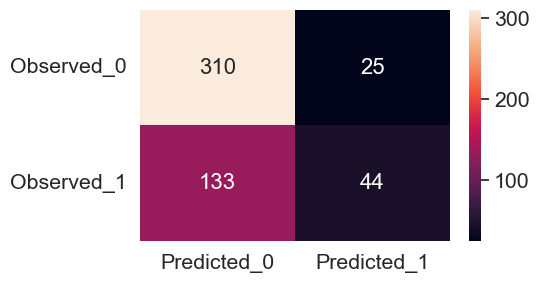

In [507]:
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (5,3))
sns.set(font_scale = 1.4) # for label size
sns.heatmap(df_cm, annot = True, annot_kws = {"size": 16}, # font size
            yticklabels = ["Observed_0","Observed_1"], 
            xticklabels = ["Predicted_0","Predicted_1"], fmt='d') 

plt.show()

Trained model still fails to predict the high sensitive cases. FEATURE SELECTION MUST BE DONE! 

### 4.3 Training regressors on CCLE mRNA data and testing their performance <a id="section_4.3"></a>

Regression will be done after previous section.

- Logistic Regression
- Lasso regression
- KNN regression
- Random Forest regressor

### 4.4 Analysis of all regressors <a id="section_4.6"></a>

## 5. Select biomarkers of drug sensitivity <a id="section_5"></a>

Comparison of feature importances of models that provide feature weights.


**For regularizationn methods (Ridge, Lasso or Elastic-net)**

In this case the importance of features is based on the absolute value of model coefficients. 

*importance = np.abs(model.coef_)*

**For ensemble strategies based on decision trees**

feature_importances = grid_search.best_estimator_.feature_importances_

*importance = model.feature_importances_*

### 5.1 Compare feature importance using feature weights <a id="section_5.1"></a>

Comparison of feature importances by using barplots (but first sorting the features based on their importance). 

### 5.2 Feature importance in literature  <a id="section_5.2"></a>

After feature importance I'll validate selected genes based on literature. 
Including references